Example Notebook
============

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
basedir = '../'
sys.path.append(basedir)

from lda_for_fragments import Ms2Lda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import sys
import visualisation.pyLDAvis as pyLDAvis

In [2]:
n_topics = 300 # number of topics, around 300-400 seems to be good from cross-validation
n_samples = 200 # how many samples to get during Gibbs sampling

n_burn = 0 # no. of burn-in samples to discard, unused
n_thin = 1 # thinning parameter, unused

# follow the recommendation from Griffith & Styver
alpha = 50.0/n_topics # hyper-parameter for document-topic distributions
beta = 0.1 # hyper-parameter for topic-word distributions

fragment_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_fragments_rel.csv'
neutral_loss_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_losses_rel.csv'
mzdiff_filename = None

ms1_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms1_rel.csv'
ms2_filename = basedir + 'input/relative_intensities/Beer_3_T10_POS_ms2_rel.csv'

In [3]:
ms2lda = Ms2Lda.lcms_data_from_R(fragment_filename, neutral_loss_filename, mzdiff_filename, 
                                 ms1_filename, ms2_filename)

Data shape (856, 1664)


In [9]:
ms2lda.run_lda(n_topics, n_samples, n_burn, n_thin, alpha, beta)

Fitting model...
CGS LDA initialising
......................................................................................
Using Numba for LDA sampling
Preparing words
Preparing Z matrix
DONE
Sample 1   Log joint likelihood = -3318093.318 
Sample 2   Log joint likelihood = -2208490.467 
Sample 3   Log joint likelihood = -1609922.294 
Sample 4   Log joint likelihood = -1414140.858 
Sample 5   Log joint likelihood = -1337783.834 
Sample 6   Log joint likelihood = -1295240.877 
Sample 7   Log joint likelihood = -1267716.821 
Sample 8   Log joint likelihood = -1248524.369 
Sample 9   Log joint likelihood = -1234490.592 
Sample 10   Log joint likelihood = -1224017.902 
Sample 11   Log joint likelihood = -1214830.492 
Sample 12   Log joint likelihood = -1206397.963 
Sample 13   Log joint likelihood = -1197718.346 
Sample 14   Log joint likelihood = -1192390.040 
Sample 15   Log joint likelihood = -1187082.506 
Sample 16   Log joint likelihood = -1182191.599 
Sample 17   Log joint likelihoo

In [5]:
ms2lda.write_results('beer3_pos_rel')

Writing topics to results/beer3_pos_rel/beer3_pos_rel_topics.csv
Writing fragments x topics to results/beer3_pos_rel/beer3_pos_rel_all.csv
Writing topic docs to results/beer3_pos_rel/beer3_pos_rel_docs.csv


In [6]:
ms2lda.model.print_topic_words()

Topic 0: fragment_109.05257 (0.186560150376), fragment_126.05442 (0.177161654135), loss_70.04156 (0.10040726817), fragment_80.04949 (0.0910087719298), loss_42.04695 (0.0612468671679),
Topic 1: fragment_195.11211 (0.380244238724), fragment_98.05999 (0.147823517825), fragment_167.1183 (0.122217845184), fragment_125.07087 (0.112369509553),
Topic 2: loss_197.08977 (0.729997994786), fragment_306.121 (0.0612592741127),
Topic 3: fragment_258.10964 (0.0882537688442), fragment_192.06425 (0.081972361809), fragment_130.04926 (0.0599874371859), loss_161.06862 (0.0505653266332), fragment_241.082 (0.0505653266332),
Topic 4: fragment_84.04487 (0.395551844542), loss_105.04249 (0.283209351753), loss_87.03188 (0.0759829968119),
Topic 5: loss_18.0095 (0.126628256513), fragment_269.12939 (0.125375751503), fragment_193.0757 (0.0577404809619), fragment_182.0845 (0.0527304609218), loss_105.05437 (0.0527304609218),
Topic 6: fragment_156.07692 (0.39484071046), fragment_110.07086 (0.155201578799),
Topic 7: loss

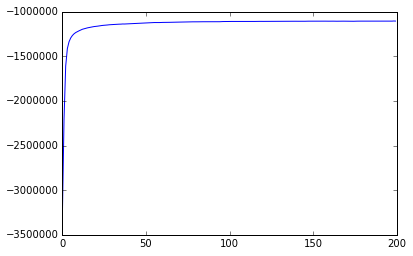

In [7]:
ms2lda.plot_log_likelihood()

2. Shared Fragments within a Topic
--------------------------------------

If the 'interactive' parameter below is True, we will show an interactive visualisation of the results in a separate tab. You need to interrupt the kernel to stop it once you're done with it (from the menu above, Kernel > Interrupt).

Ranking topics ...
Topic 235 h-index=7
Topic 235 has 7 ms1 peaks
Topic 29 h-index=5
Topic 29 has 19 ms1 peaks
Topic 173 h-index=5
Topic 173 has 6 ms1 peaks
Topic 71 h-index=4
Topic 71 has 11 ms1 peaks
Topic 87 h-index=4
Topic 87 has 5 ms1 peaks
Topic 106 h-index=4
Topic 106 has 4 ms1 peaks
Topic 181 h-index=4
Topic 181 has 9 ms1 peaks
Topic 202 h-index=4
Topic 202 has 14 ms1 peaks
Topic 203 h-index=4
Topic 203 has 22 ms1 peaks
Topic 206 h-index=4
Topic 206 has 4 ms1 peaks
Topic 280 h-index=4
Topic 280 has 6 ms1 peaks
Topic 291 h-index=4
Topic 291 has 7 ms1 peaks
Topic 1 h-index=3
Topic 1 has 4 ms1 peaks
Topic 17 h-index=3
Topic 17 has 4 ms1 peaks
Topic 30 h-index=3
Topic 30 has 6 ms1 peaks
Topic 33 h-index=3
Topic 33 has 5 ms1 peaks
Topic 39 h-index=3
Topic 39 has 9 ms1 peaks
Topic 42 h-index=3
Topic 42 has 4 ms1 peaks
Topic 46 h-index=3
Topic 46 has 10 ms1 peaks
Topic 59 h-index=3
Topic 59 has 3 ms1 peaks
Topic 61 h-index=3
Topic 61 has 6 ms1 peaks
Topic 64 h-index=3
Topic 64 has 4 ms

../visualisation/pyLDAvis/skbio/_principal_coordinate_analysis.py:109: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.115320682896 and the largest is 2.23891696903.
  RuntimeWarning
127.0.0.1 - - [17/Jul/2015 03:16:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2015 03:16:28] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2015 03:16:28] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2015 03:16:28] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2015 03:16:28] "GET /images/default_logo.png HTTP/1.1" 200 -
127.0.0.1 - - [17/Jul/2015 03:16:32] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic126&action=load HTTP/1.1" 200 -
Traceback (most recent ca

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 45349)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:16:40] "GE


Exception happened during processing of request from ('127.0.0.1', 45350)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:16:44] "GE


Exception happened during processing of request from ('127.0.0.1', 45356)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:16:44] "GE


Exception happened during processing of request from ('127.0.0.1', 45357)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:06] "GE


Exception happened during processing of request from ('127.0.0.1', 45375)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:06] "GE


Exception happened during processing of request from ('127.0.0.1', 45376)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:06] "GE


Exception happened during processing of request from ('127.0.0.1', 45377)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:06] "GE


Exception happened during processing of request from ('127.0.0.1', 45378)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:09] "GE


Exception happened during processing of request from ('127.0.0.1', 45384)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:09] "GE


Exception happened during processing of request from ('127.0.0.1', 45385)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:15] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic155&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 45393)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:15] "GE


Exception happened during processing of request from ('127.0.0.1', 45394)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:15] "GE


Exception happened during processing of request from ('127.0.0.1', 45395)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45396)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45397)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45398)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45399)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45401)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:16] "GE


Exception happened during processing of request from ('127.0.0.1', 45400)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:17] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic1&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    


Exception happened during processing of request from ('127.0.0.1', 45406)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:18] "GE


Exception happened during processing of request from ('127.0.0.1', 45407)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:27] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic147&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 45415)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45416)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45417)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:28] "GE


Exception happened during processing of request from ('127.0.0.1', 45418)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:28] "GE


Exception happened during processing of request from ('127.0.0.1', 45423)
----------------------------------------
----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 45424)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:29] "GE


Exception happened during processing of request from ('127.0.0.1', 45425)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:42] "GE


Exception happened during processing of request from ('127.0.0.1', 45441)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:43] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic4&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    


Exception happened during processing of request from ('127.0.0.1', 45443)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:45] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic4&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    


Exception happened during processing of request from ('127.0.0.1', 45445)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:45] "GE


Exception happened during processing of request from ('127.0.0.1', 45446)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:45] "GE


Exception happened during processing of request from ('127.0.0.1', 45447)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:46] "GE


Exception happened during processing of request from ('127.0.0.1', 45448)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:46] "GE


Exception happened during processing of request from ('127.0.0.1', 45449)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:17:48] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic4&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    


Exception happened during processing of request from ('127.0.0.1', 45451)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45452)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45453)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45454)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45455)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45456)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:49] "GE


Exception happened during processing of request from ('127.0.0.1', 45457)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:51] "GE


Exception happened during processing of request from ('127.0.0.1', 45462)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:51] "GE


Exception happened during processing of request from ('127.0.0.1', 45463)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:52] "GE


Exception happened during processing of request from ('127.0.0.1', 45464)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:52] "GE


Exception happened during processing of request from ('127.0.0.1', 45465)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:52] "GE


Exception happened during processing of request from ('127.0.0.1', 45466)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:17:52] "GE


Exception happened during processing of request from ('127.0.0.1', 45467)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45480)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45481)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45482)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45483)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45484)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:13] "GE


Exception happened during processing of request from ('127.0.0.1', 45485)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:14] "GE


Exception happened during processing of request from ('127.0.0.1', 45486)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:14] "GE


Exception happened during processing of request from ('127.0.0.1', 45487)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:15] "GE


Exception happened during processing of request from ('127.0.0.1', 45493)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:15] "GE


Exception happened during processing of request from ('127.0.0.1', 45494)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:20] "GE


Exception happened during processing of request from ('127.0.0.1', 45501)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:20] "GE


Exception happened during processing of request from ('127.0.0.1', 45502)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:20] "GE


Exception happened during processing of request from ('127.0.0.1', 45503)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:20] "GE


Exception happened during processing of request from ('127.0.0.1', 45504)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:20] "GE


Exception happened during processing of request from ('127.0.0.1', 45505)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:21] "GE


Exception happened during processing of request from ('127.0.0.1', 45511)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:21] "GE


Exception happened during processing of request from ('127.0.0.1', 45512)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:21] "GE


Exception happened during processing of request from ('127.0.0.1', 45513)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:22] "GE


Exception happened during processing of request from ('127.0.0.1', 45514)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:25] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic67&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
   


Exception happened during processing of request from ('127.0.0.1', 45520)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45521)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45522)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45523)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45524)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45525)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45526)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:26] "GE


Exception happened during processing of request from ('127.0.0.1', 45527)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45528)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45529)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45532)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45530)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:27] "GE


Exception happened during processing of request from ('127.0.0.1', 45531)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:27] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic14&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
   


Exception happened during processing of request from ('127.0.0.1', 45535)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:28] "GE


Exception happened during processing of request from ('127.0.0.1', 45536)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:35] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic139&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 45546)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:35] "GE


Exception happened during processing of request from ('127.0.0.1', 45547)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45548)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45549)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45550)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45551)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45552)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:36] "GE


Exception happened during processing of request from ('127.0.0.1', 45553)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:37] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic14&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
   


Exception happened during processing of request from ('127.0.0.1', 45555)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:37] "GE


Exception happened during processing of request from ('127.0.0.1', 45556)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:37] "GE


Exception happened during processing of request from ('127.0.0.1', 45557)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:38] "GE


Exception happened during processing of request from ('127.0.0.1', 45558)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:38] "GE


Exception happened during processing of request from ('127.0.0.1', 45559)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:38] "GE


Exception happened during processing of request from ('127.0.0.1', 45560)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:38] "GE


Exception happened during processing of request from ('127.0.0.1', 45561)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:38] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic107&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
  


Exception happened during processing of request from ('127.0.0.1', 45562)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:38] "GE


Exception happened during processing of request from ('127.0.0.1', 45563)
----------------------------------------
----------------------------------------

127.0.0.1 - - [17/Jul/2015 03:18:39] "GET /topic?circle_id=ldavis_el195731396531670415361721096618-topic78&action=load HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
   


Exception happened during processing of request from ('127.0.0.1', 45569)
----------------------------------------
----------------------------------------

Traceback (most recent call last):
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 657, in __init__
    self.finish()
  File "/home/joewandy/anaconda/lib/python2.7/SocketServer.py", line 716, in finish
    self.wfile.close()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/joewandy/anaconda/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_offset:write_offset+buffer_size])
error: [Errno 32] Broken pipe
127.0.0.1 - - [17/Jul/2015 03:18:39] "GE


Exception happened during processing of request from ('127.0.0.1', 45570)
----------------------------------------

stopping Server...


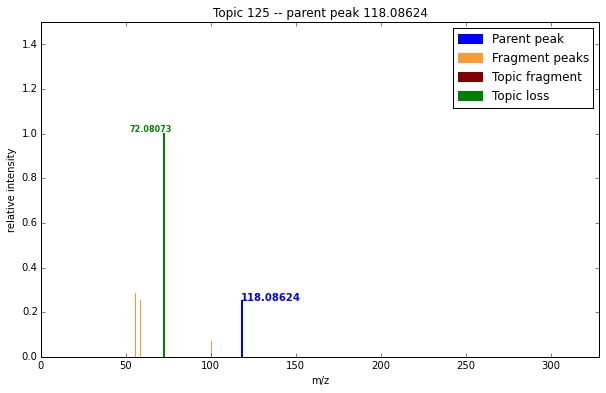

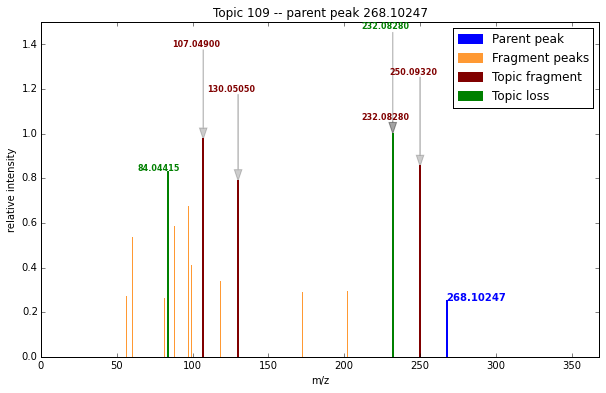

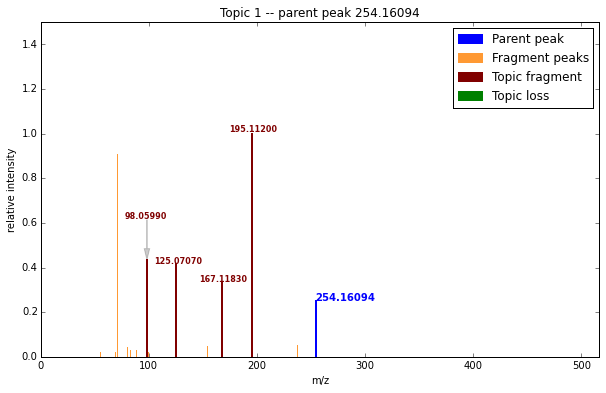

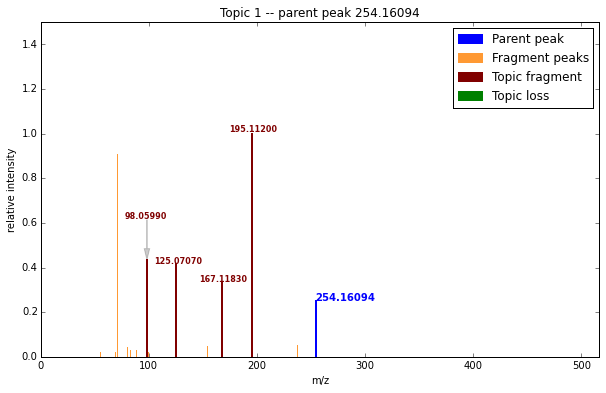

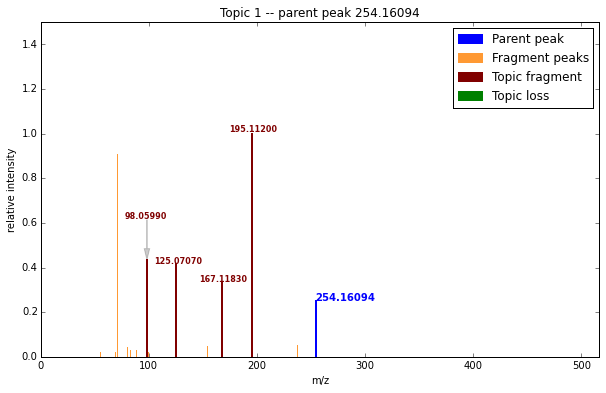

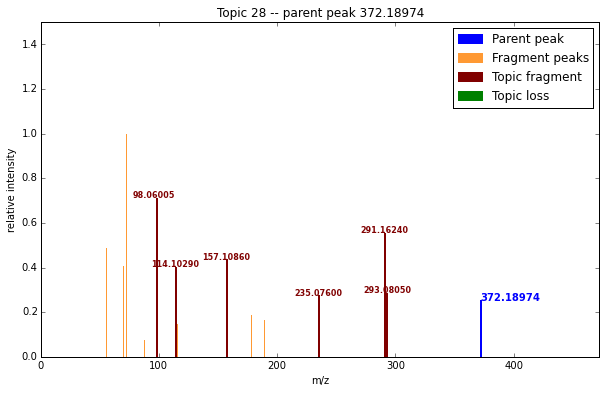

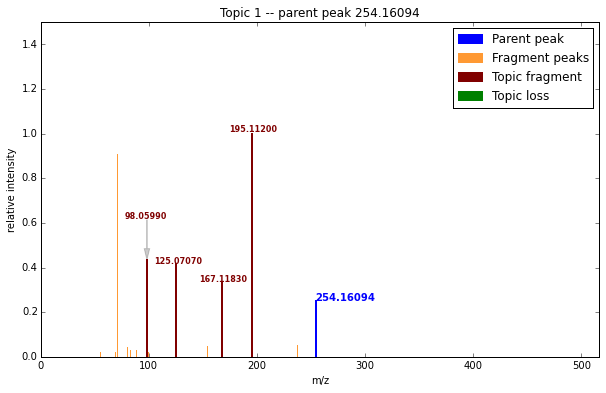

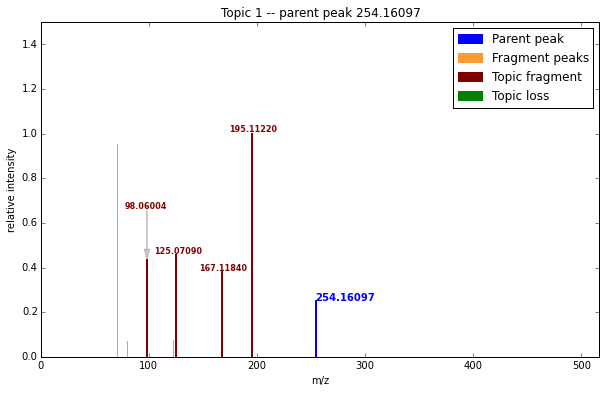

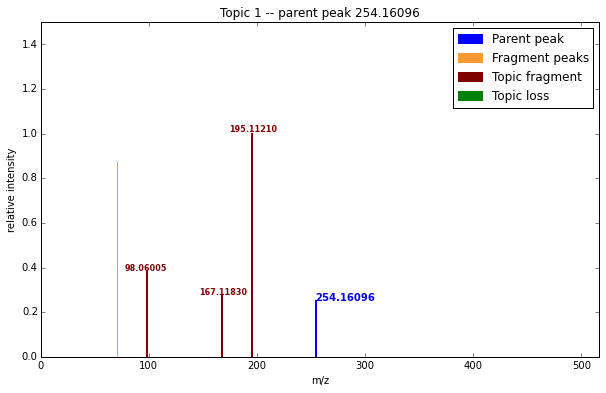

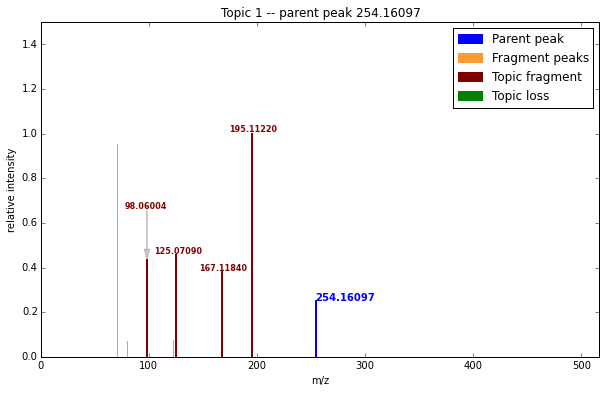

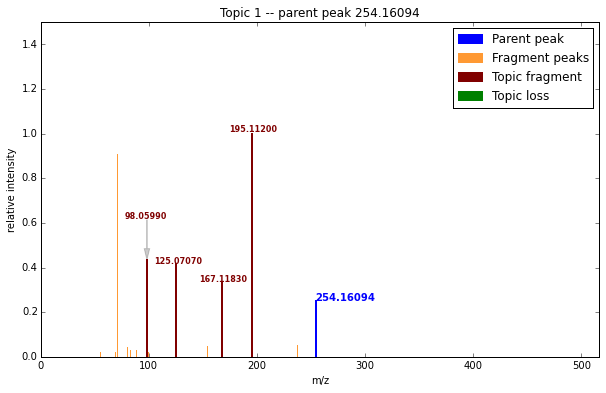

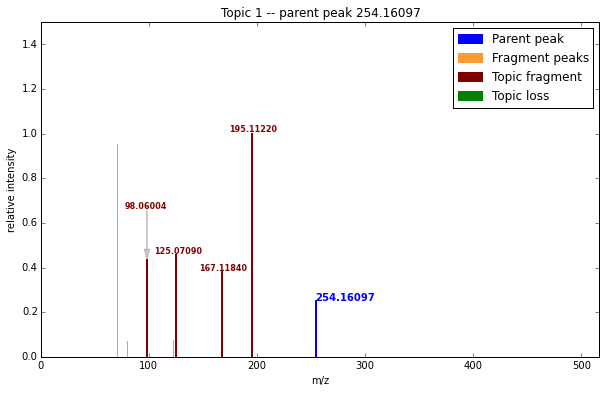

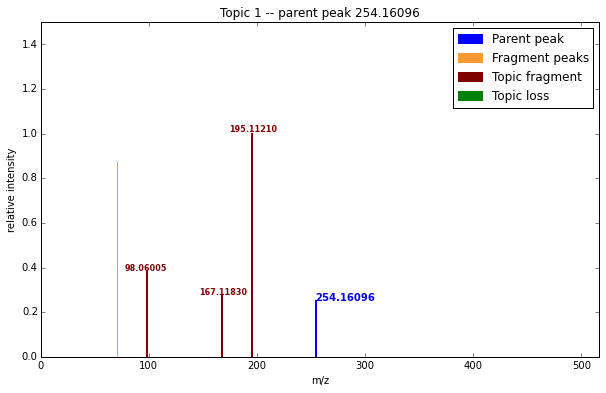

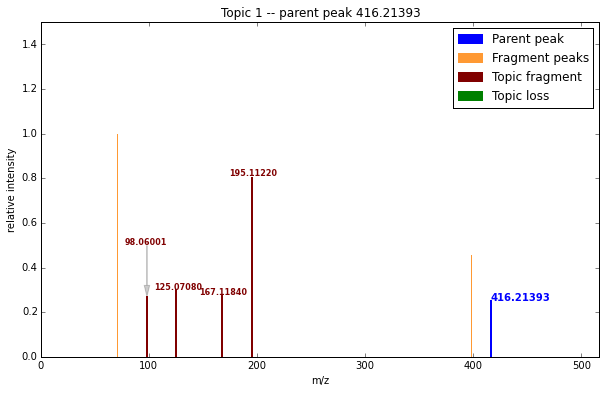

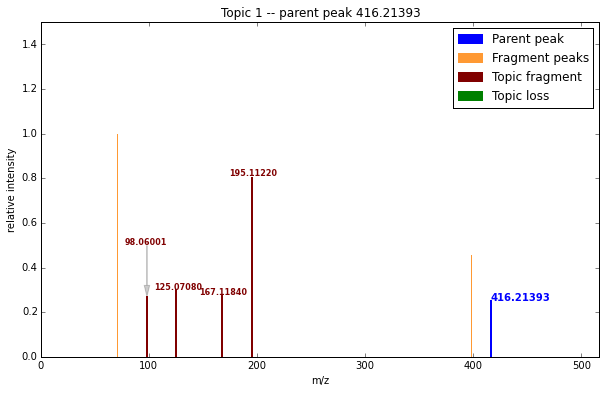

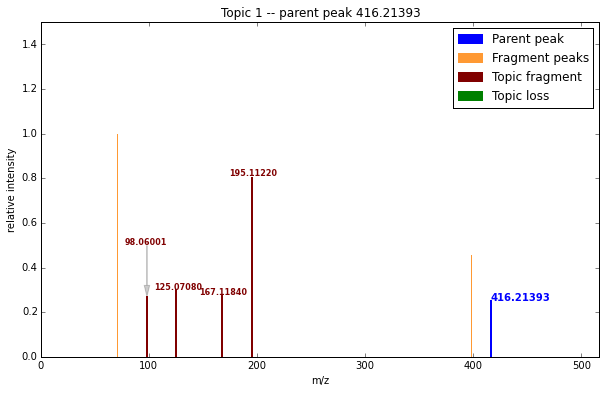

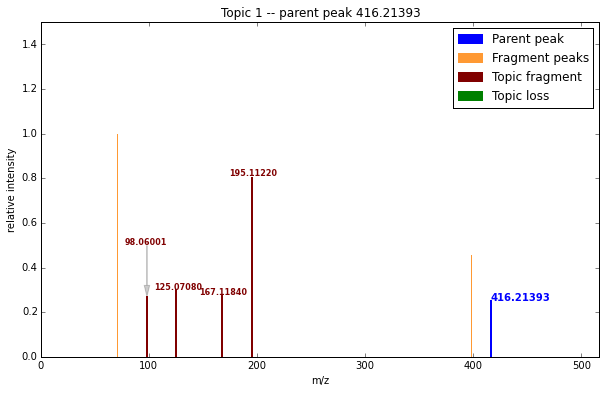

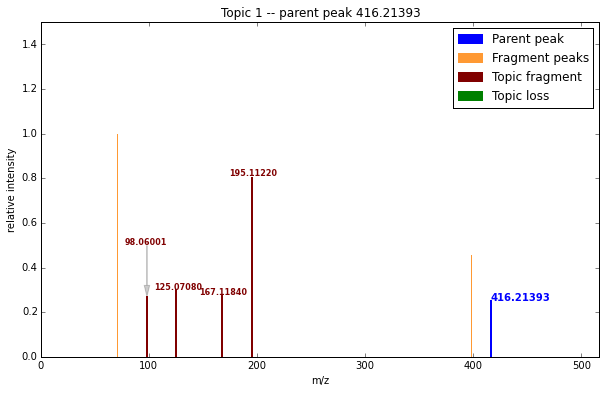

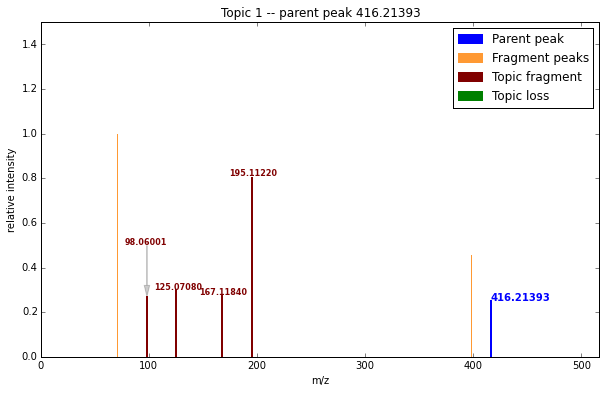

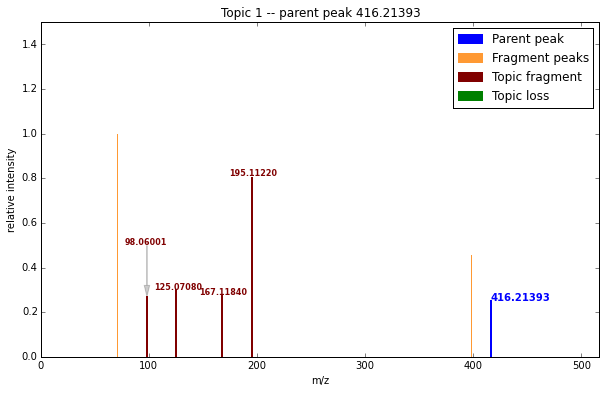

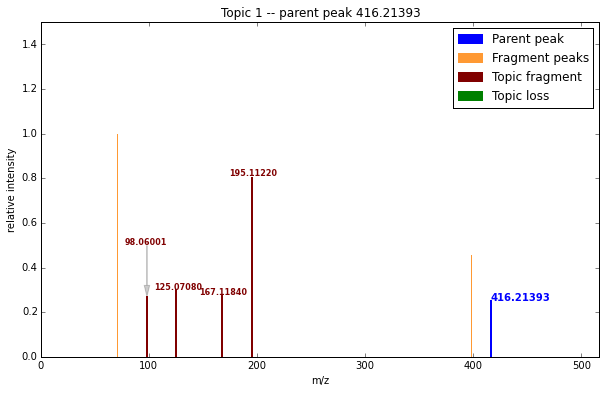

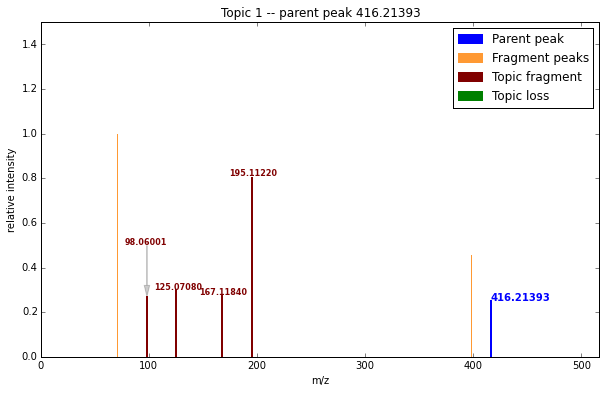

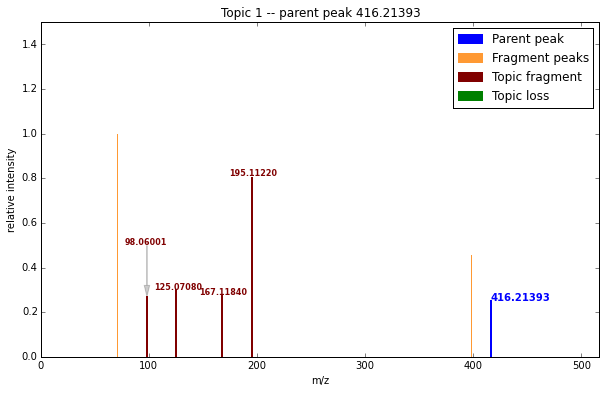

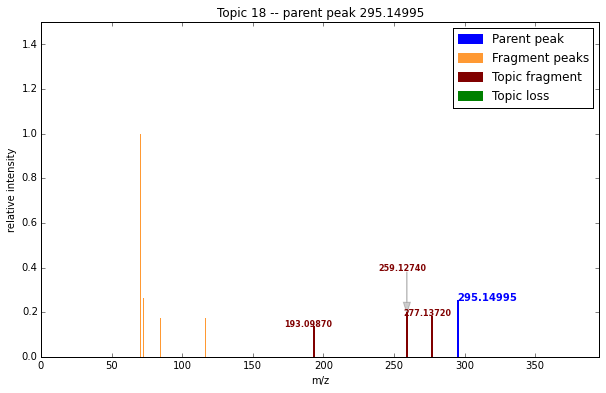

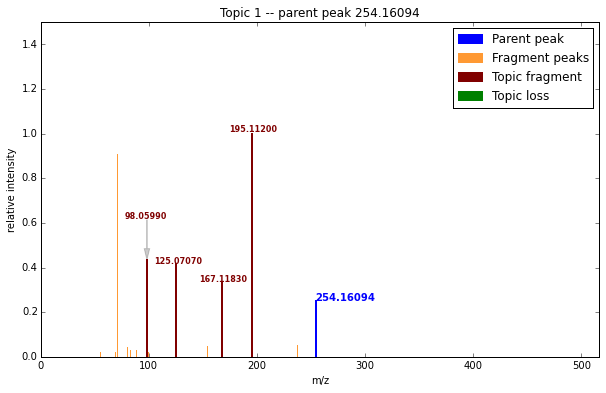

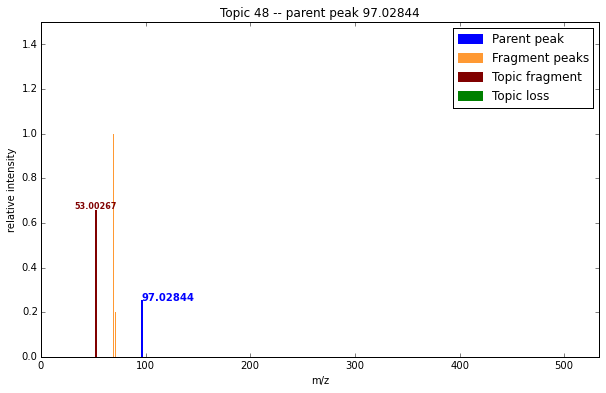

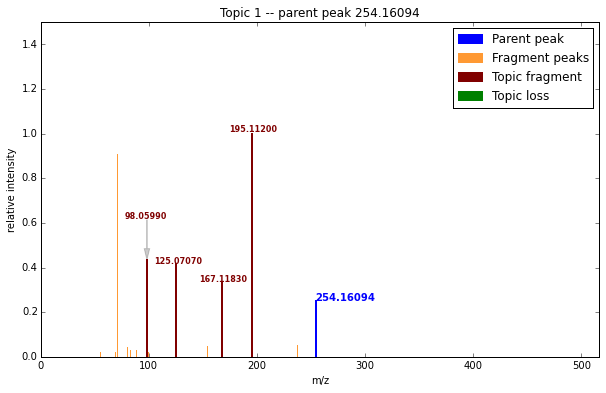

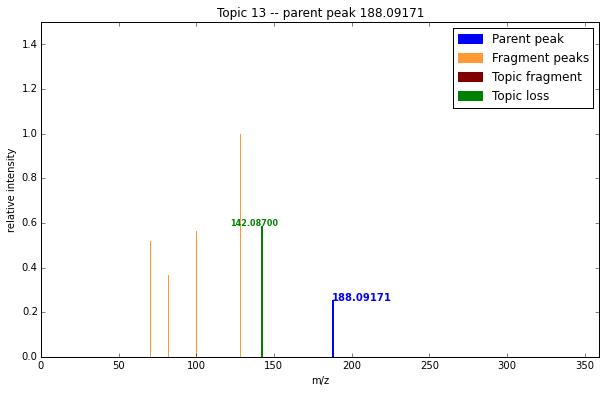

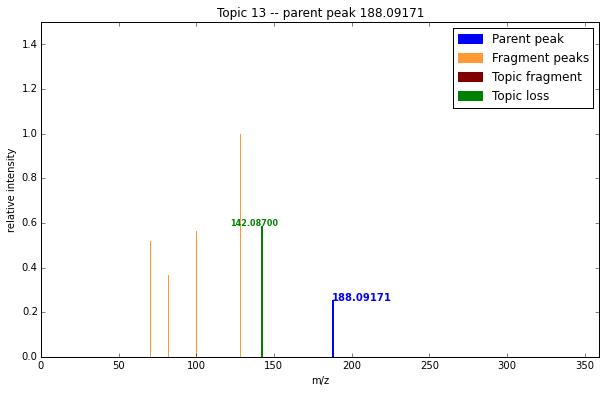

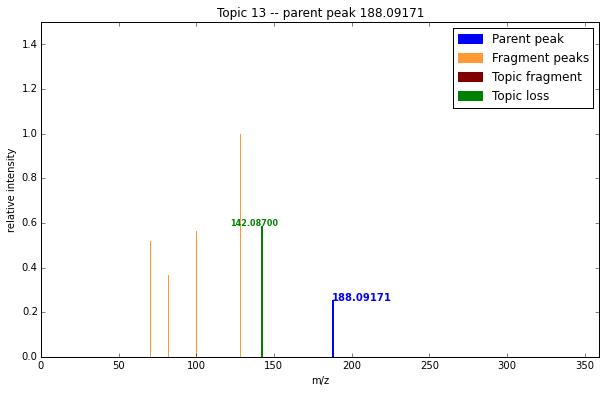

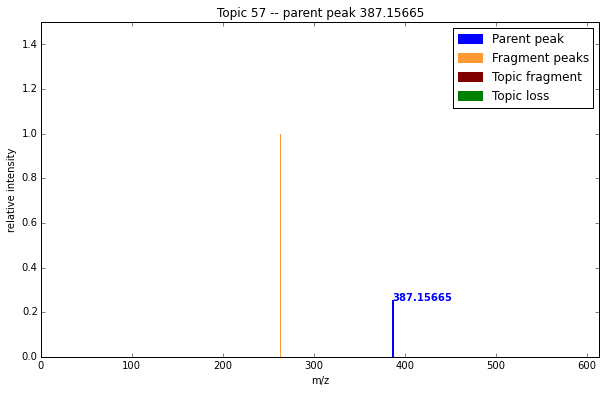

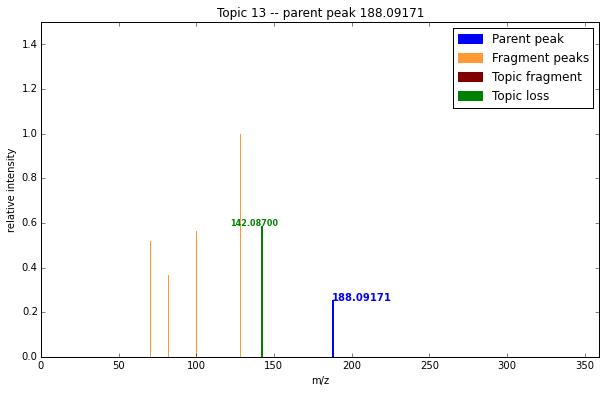

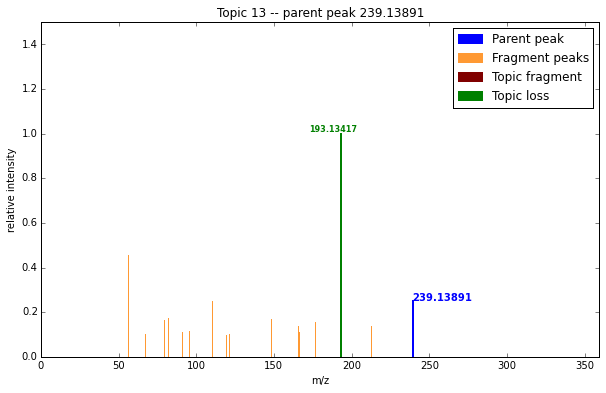

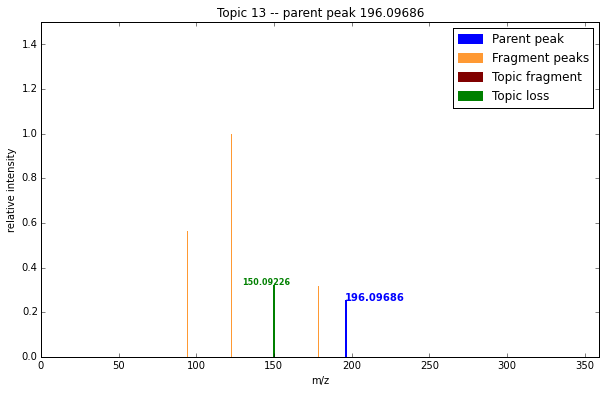

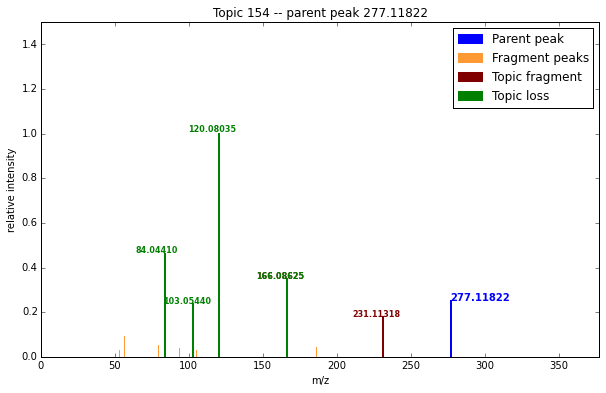

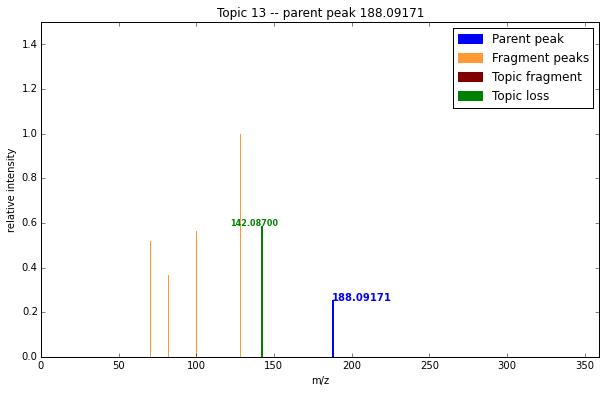

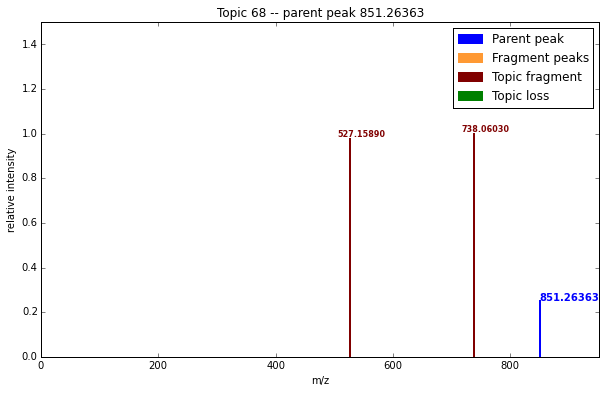

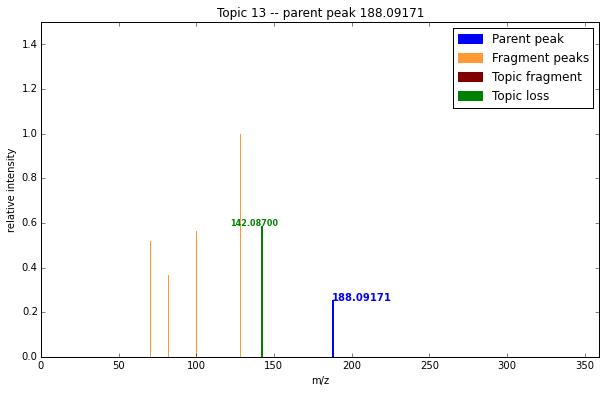

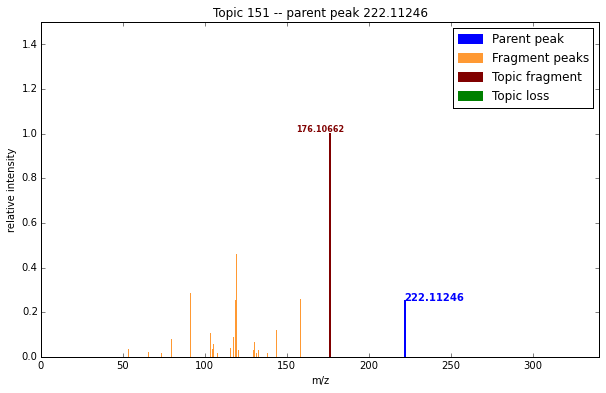

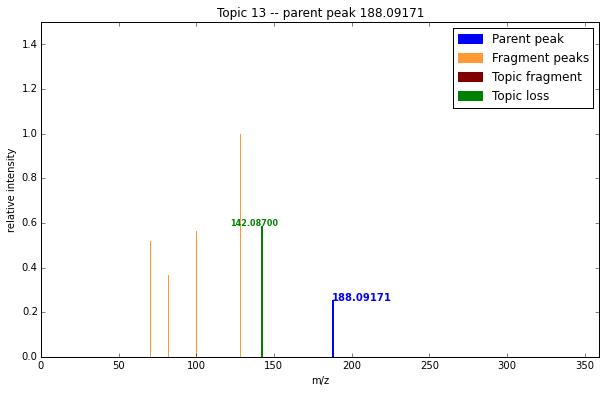

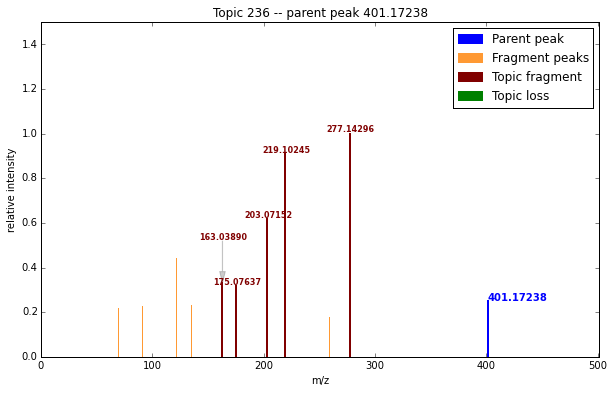

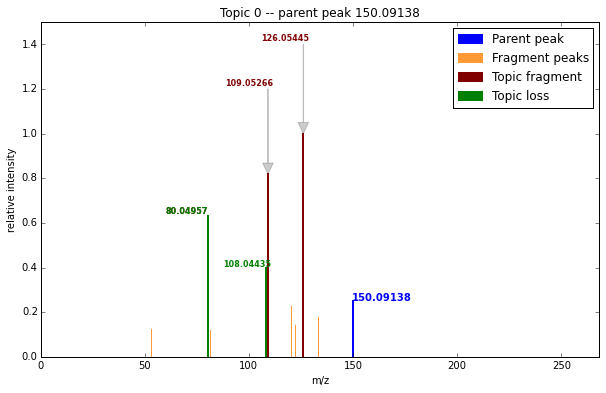

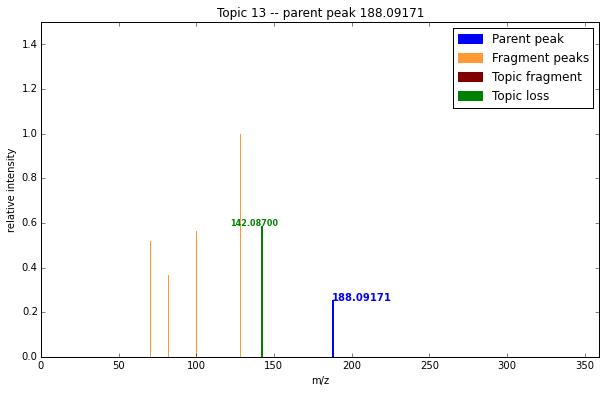

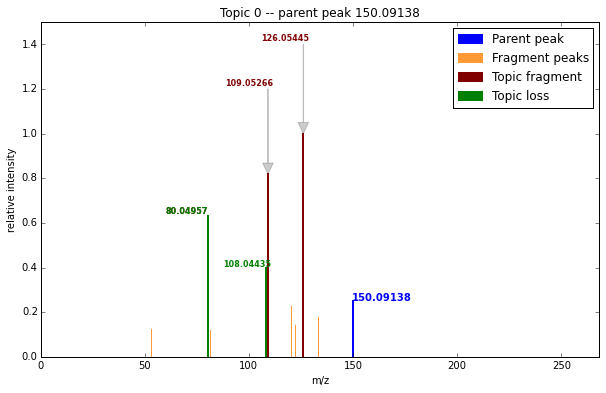

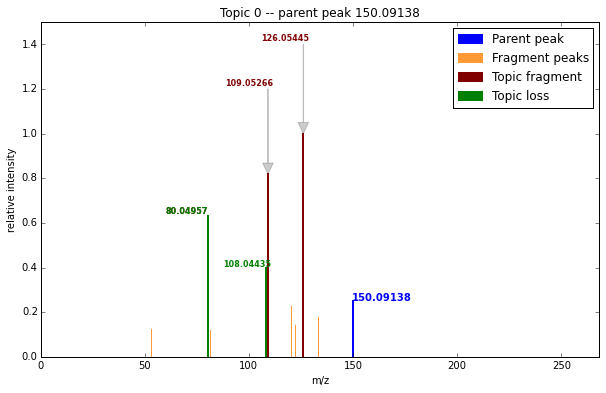

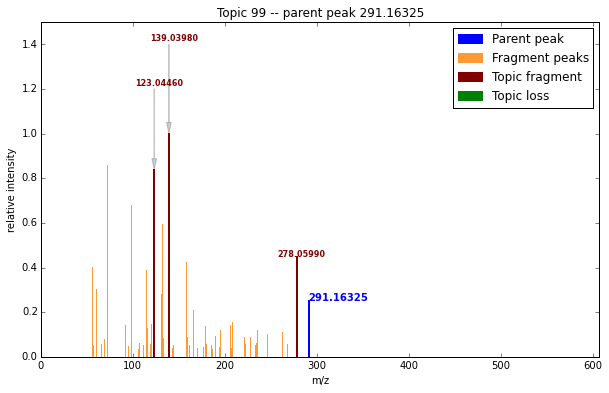

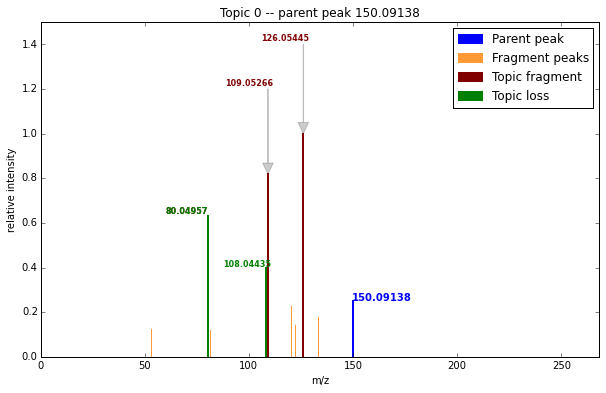

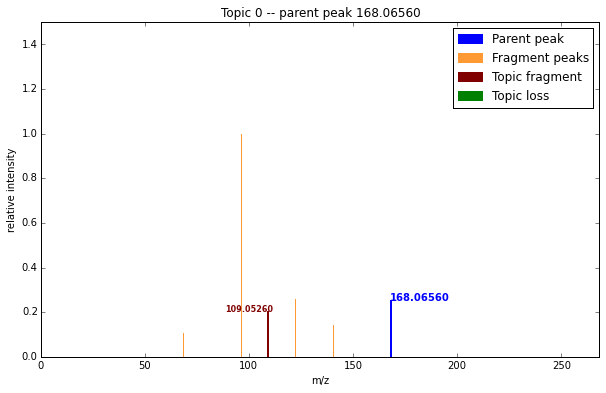

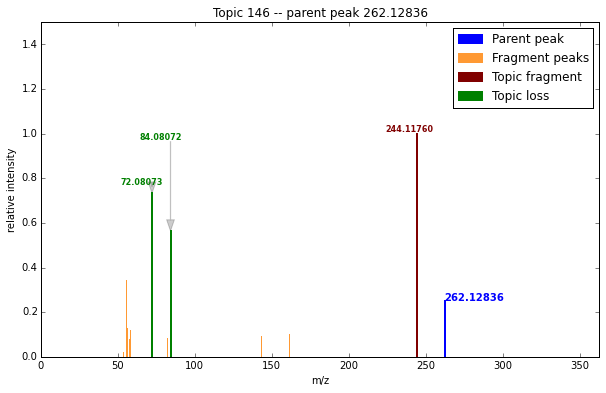

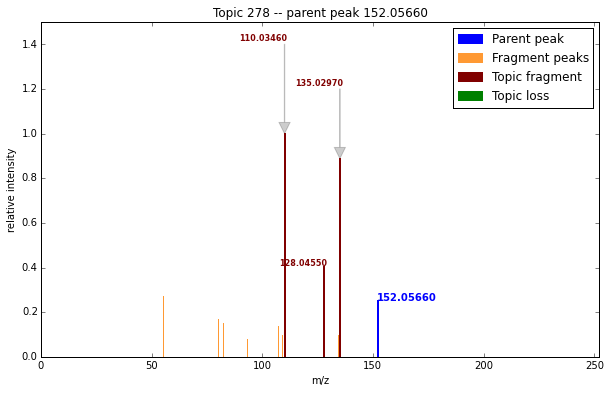

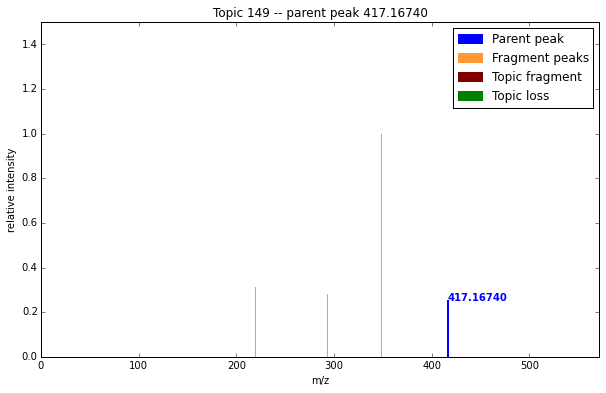

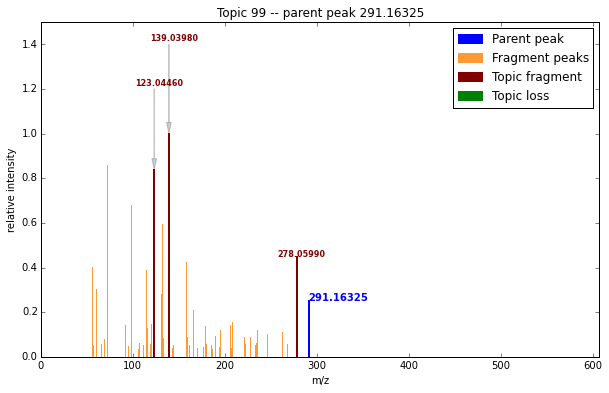

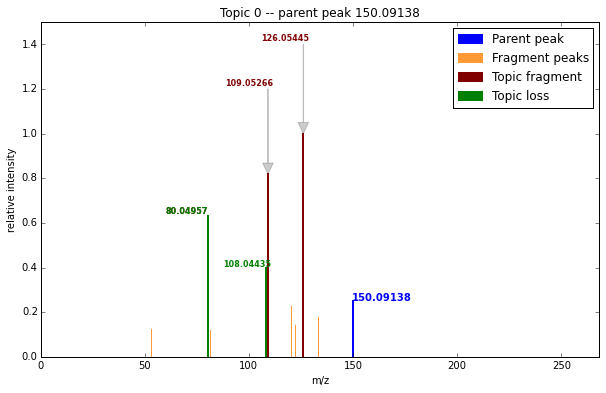

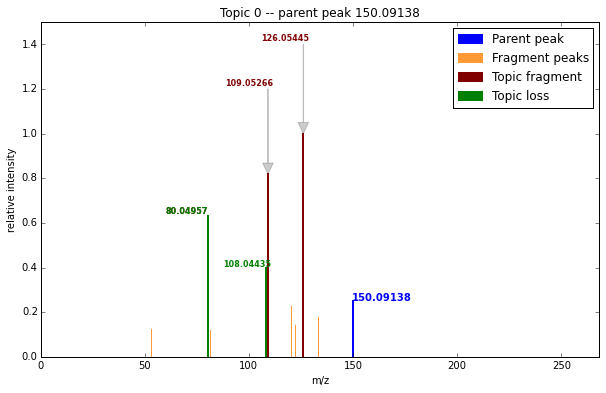

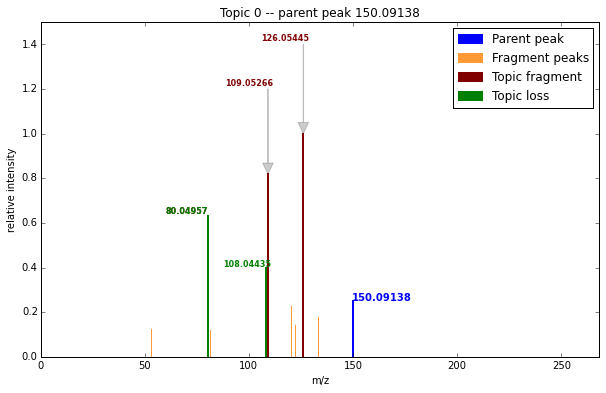

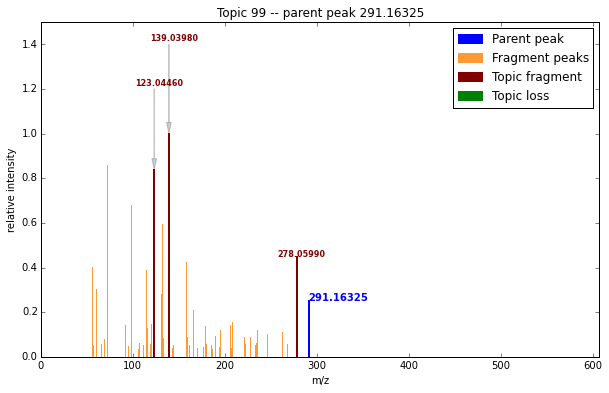

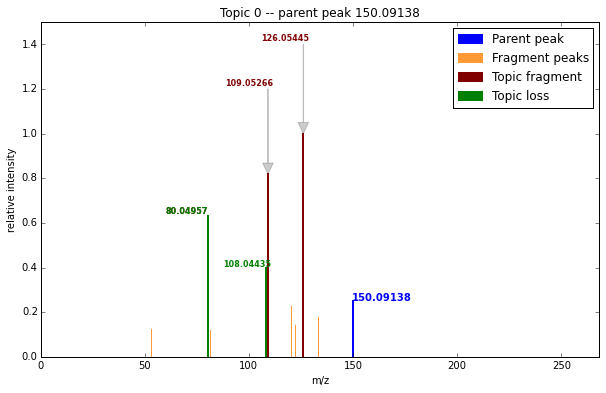

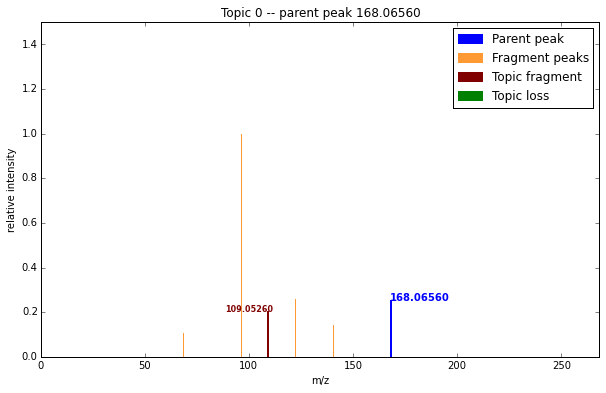

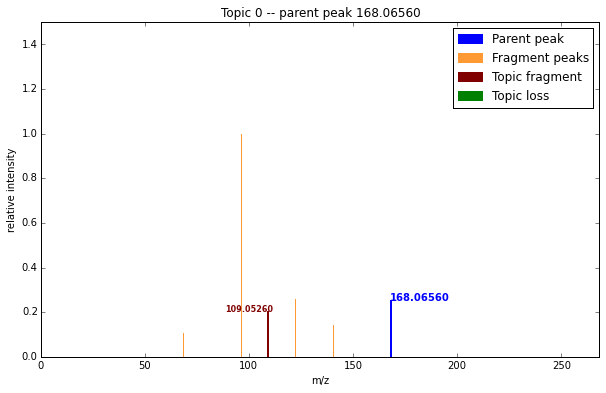

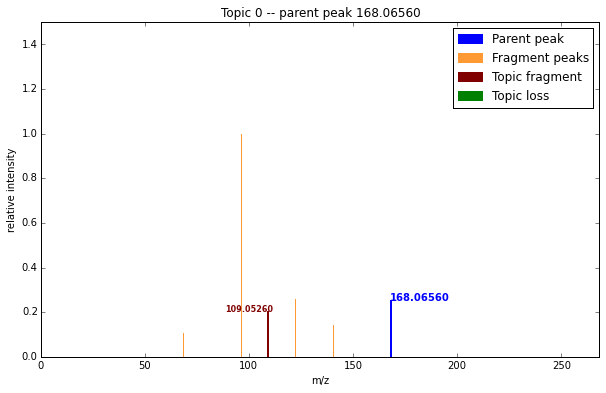

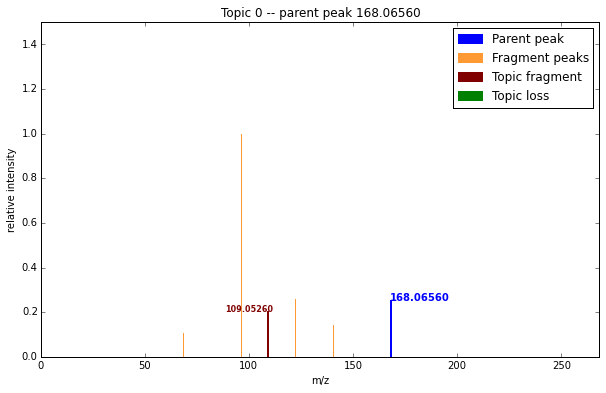

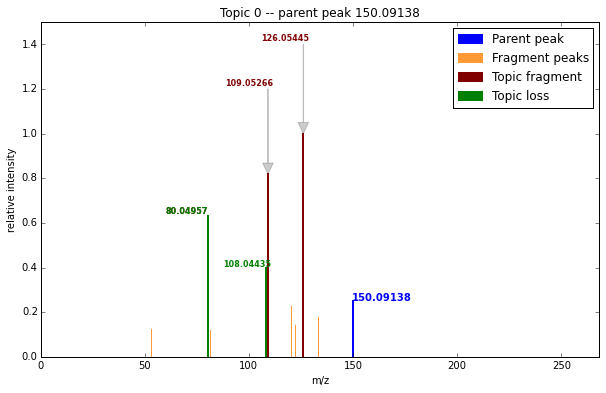

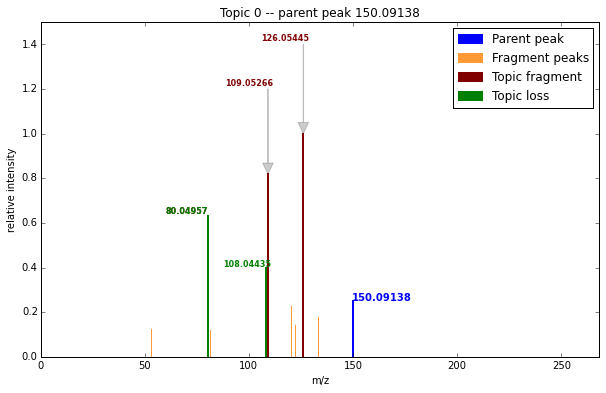

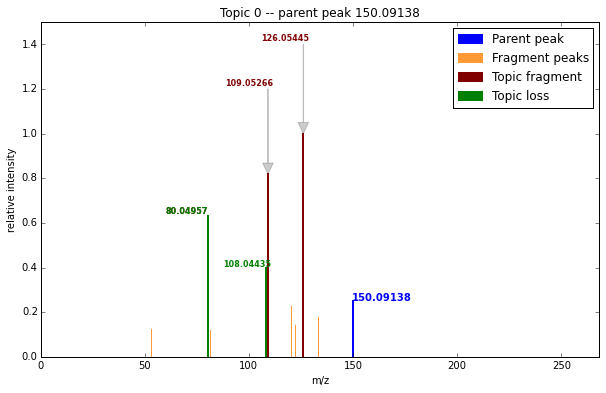

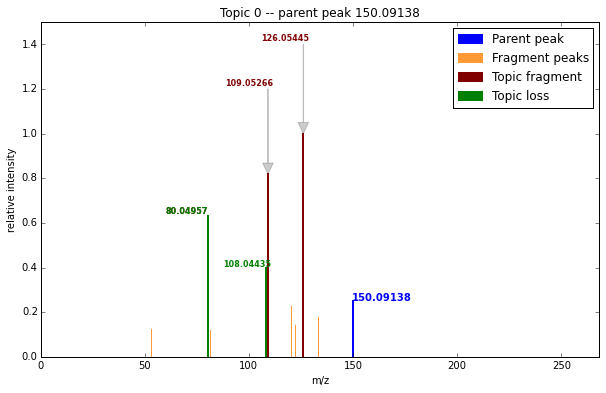

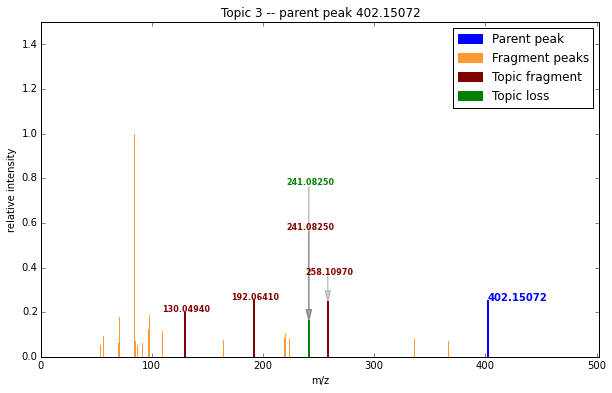

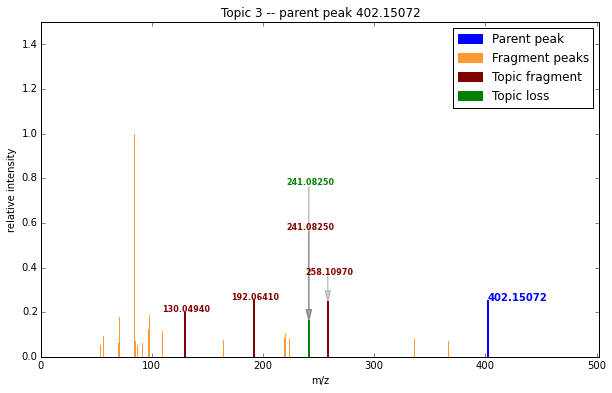

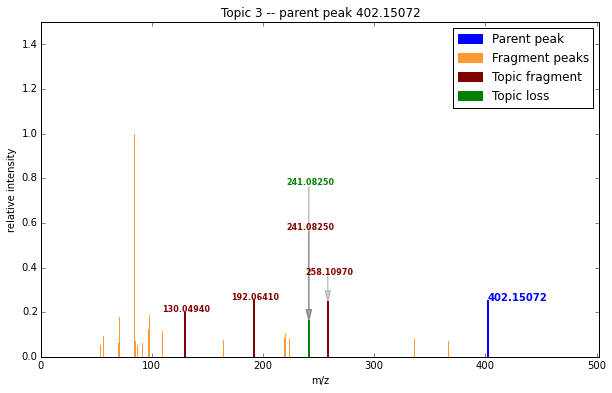

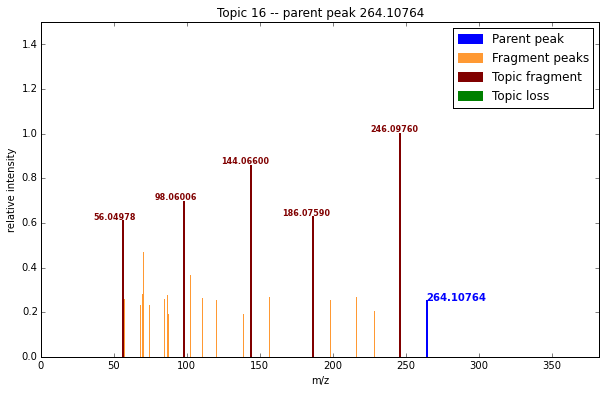

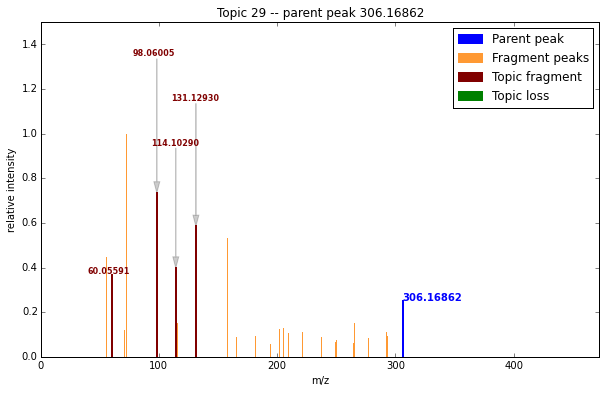

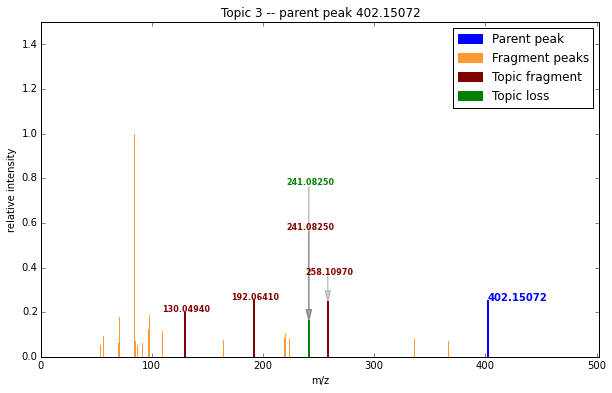

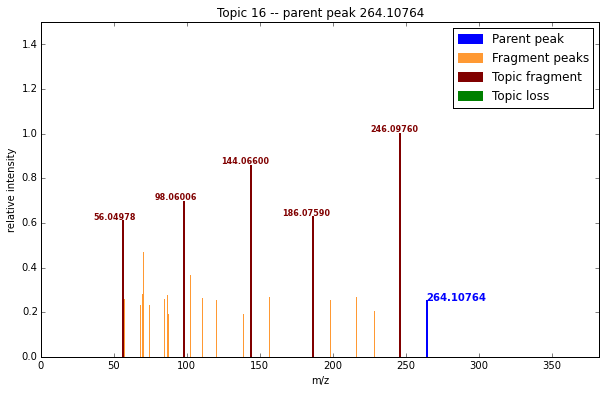

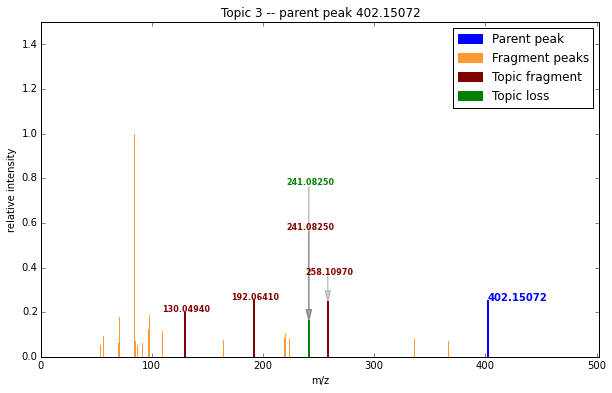

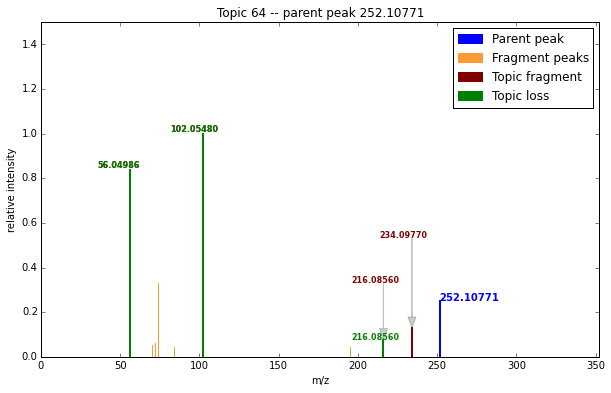

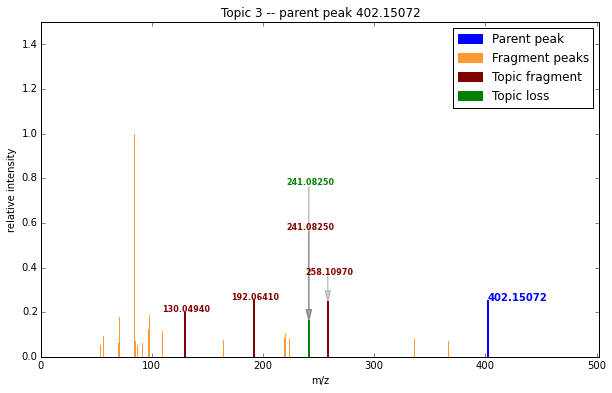

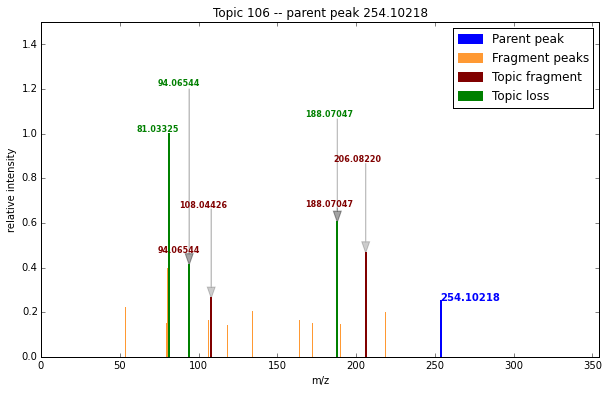

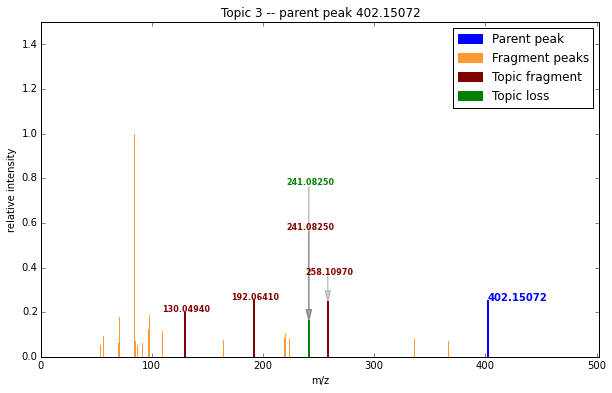

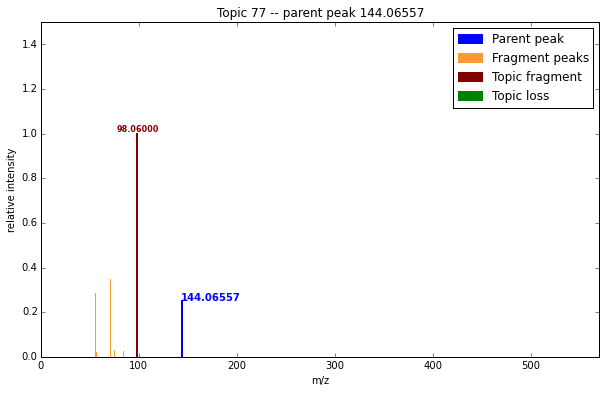

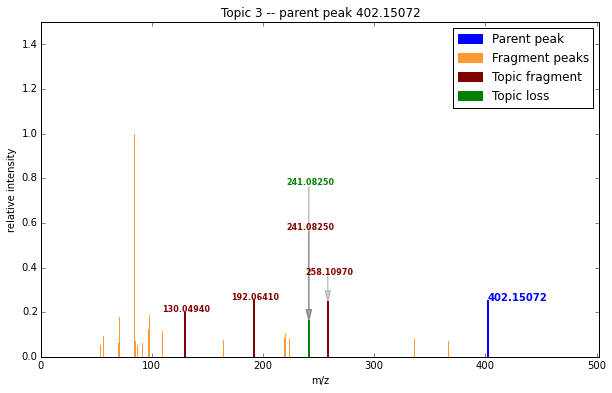

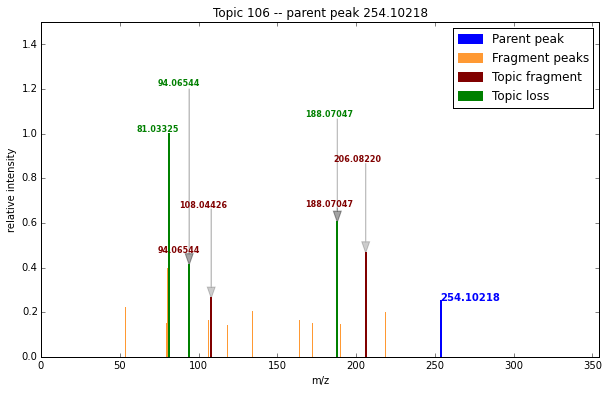

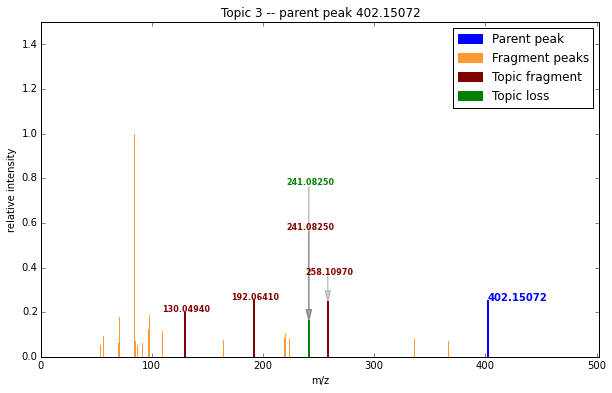

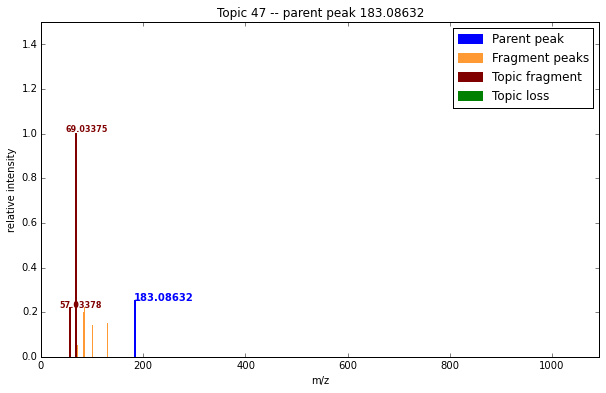

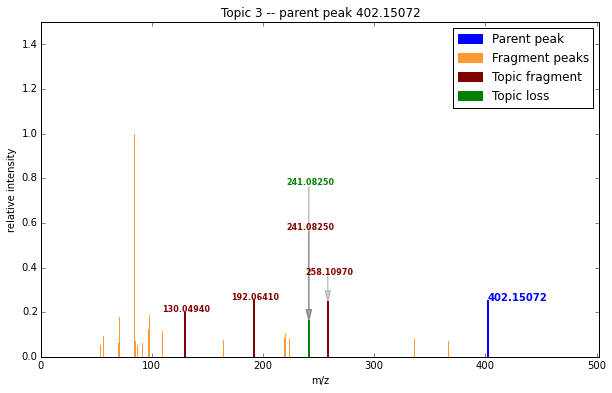

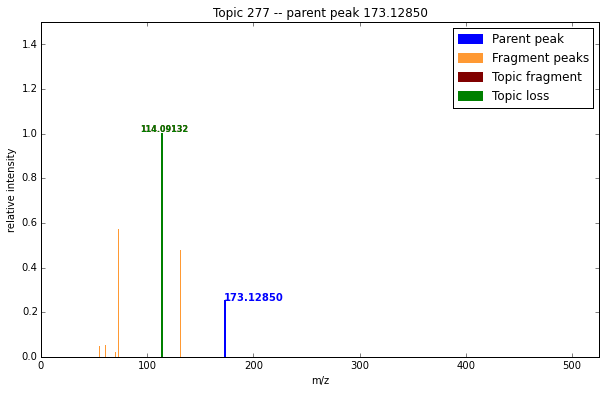

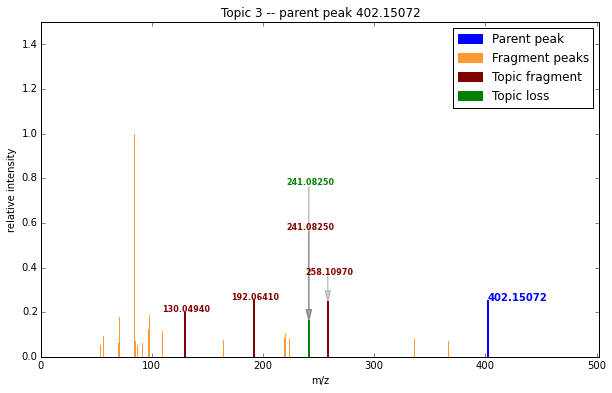

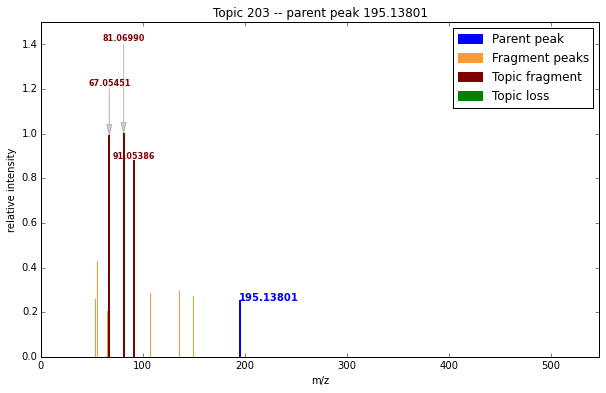

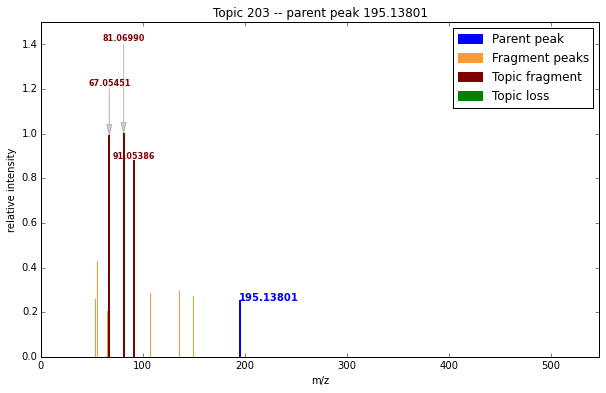

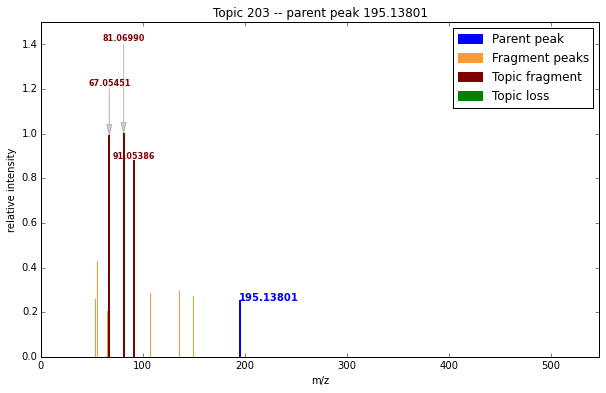

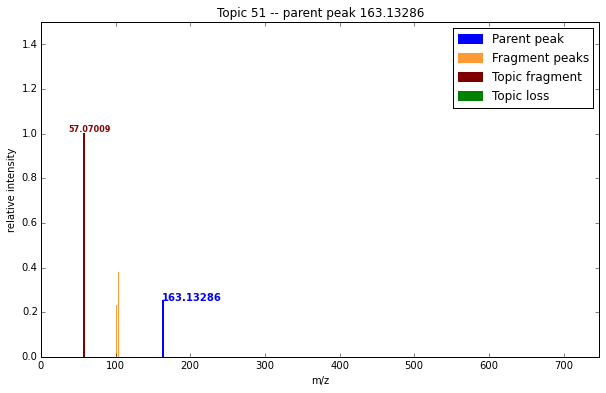

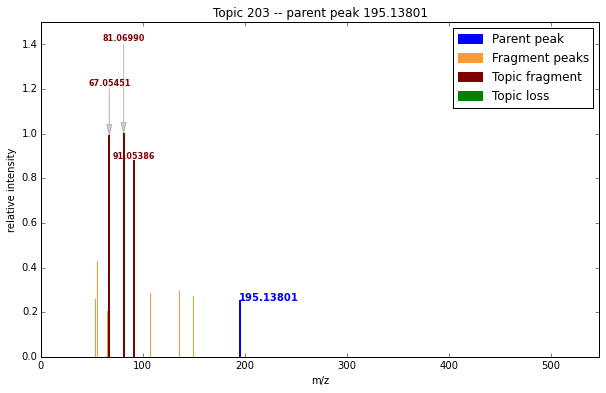

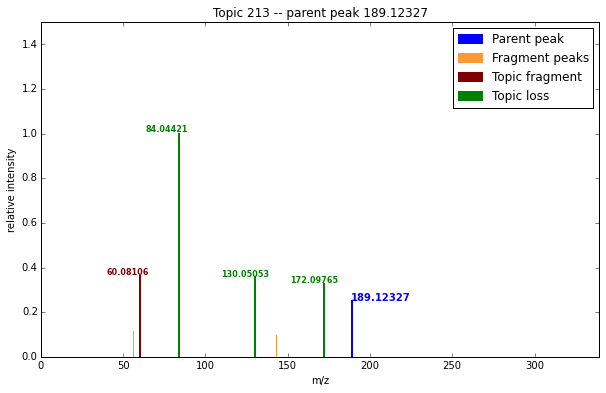

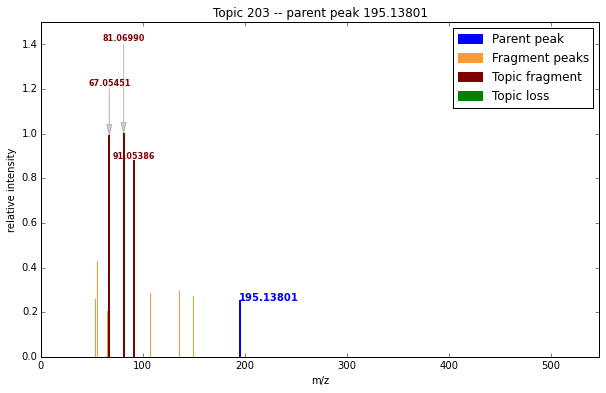

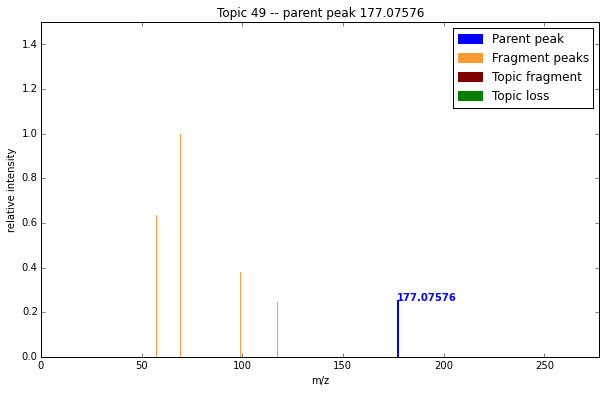

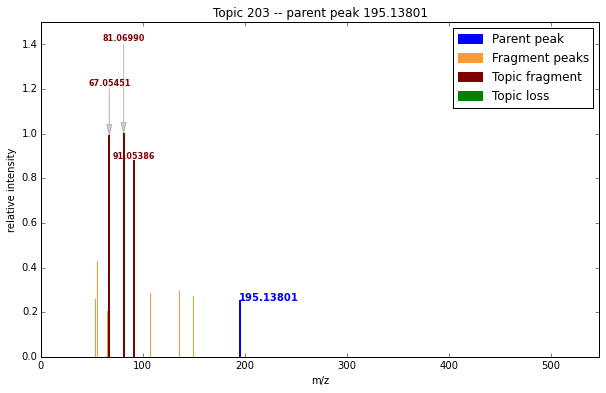

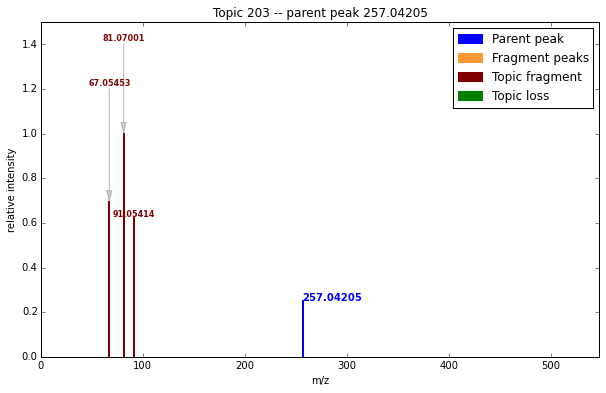

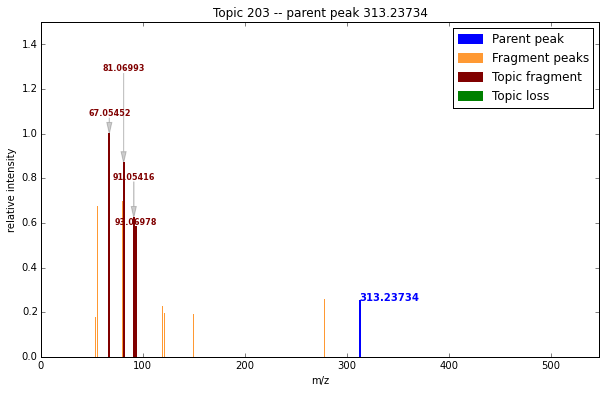

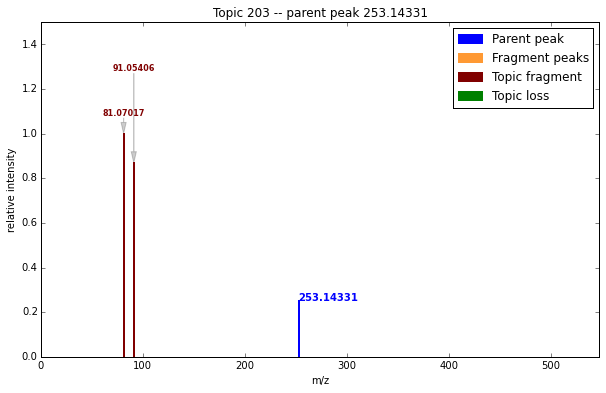

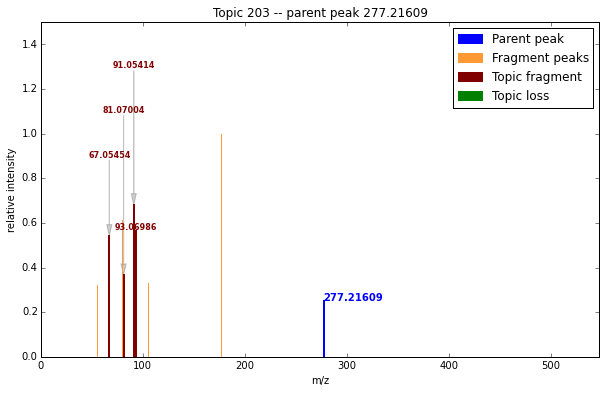

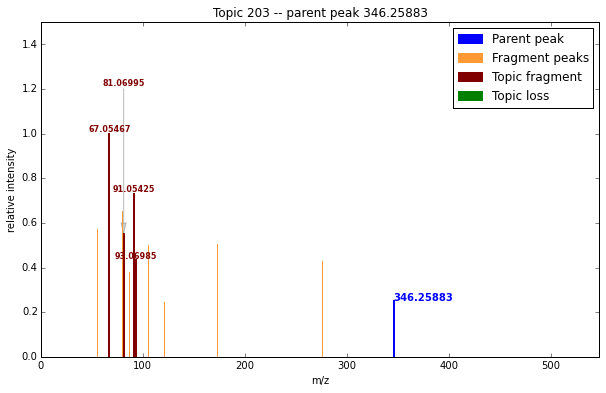

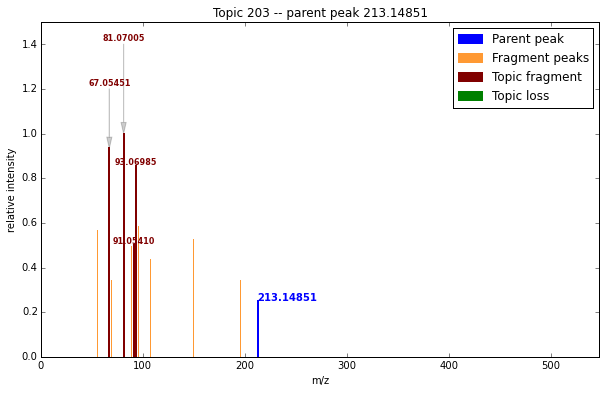

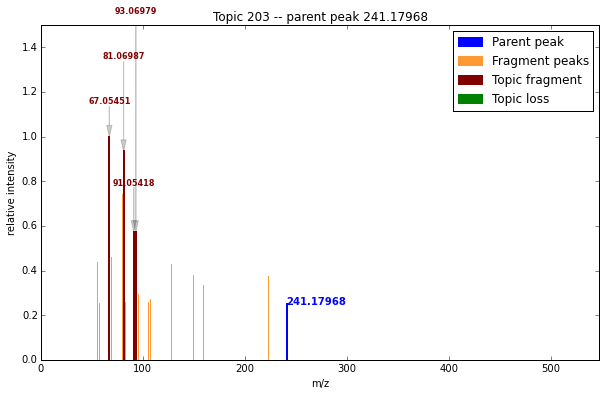

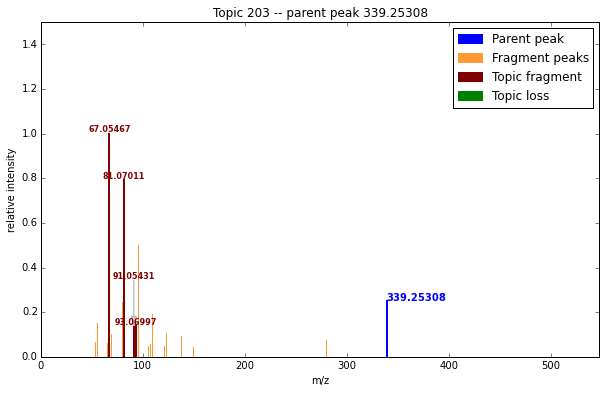

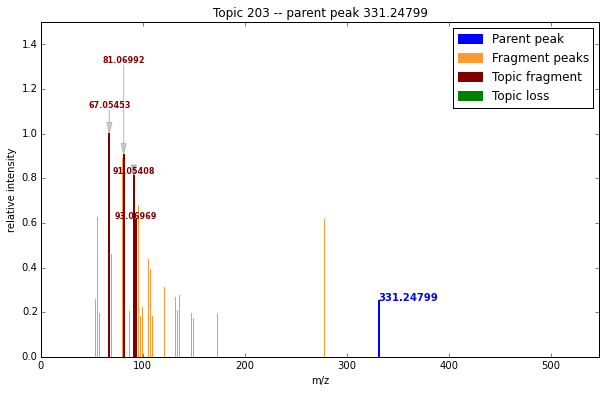

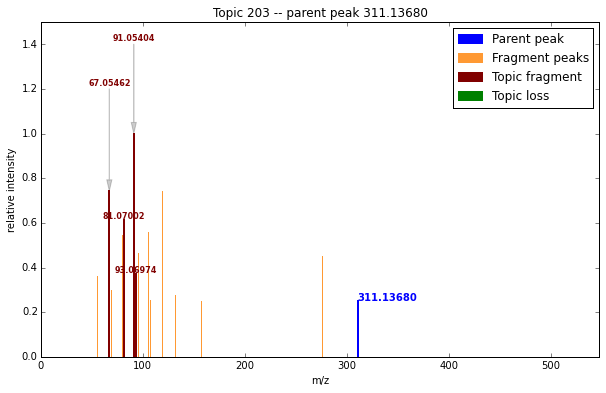

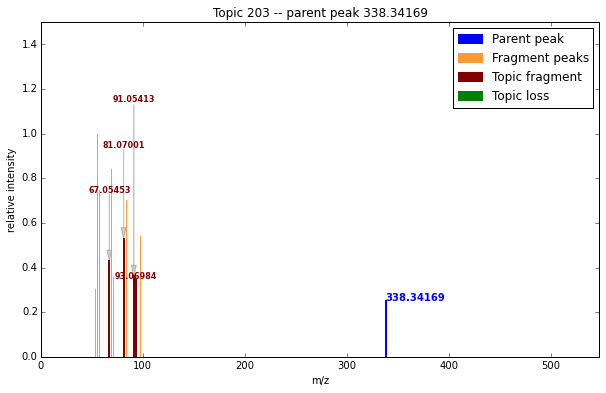

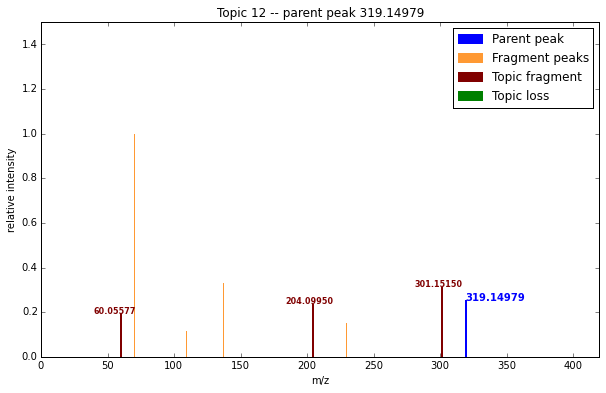

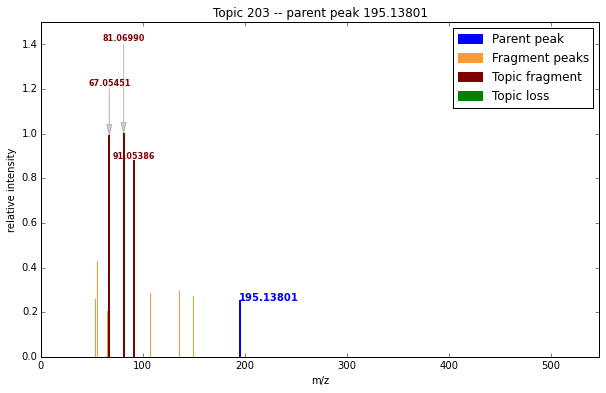

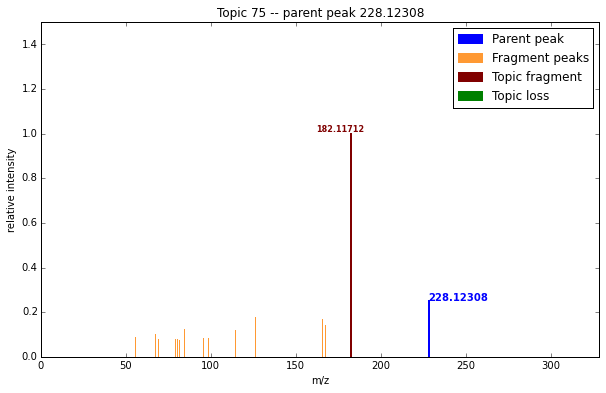

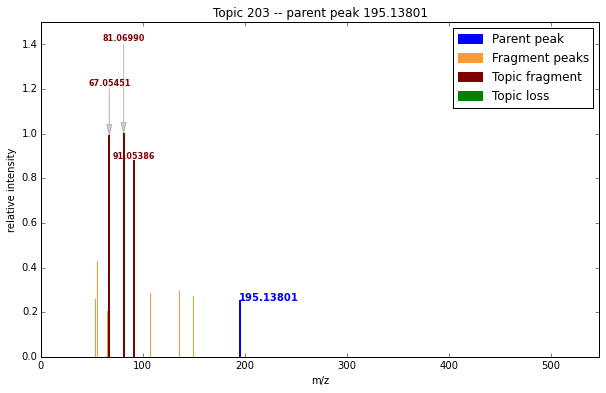

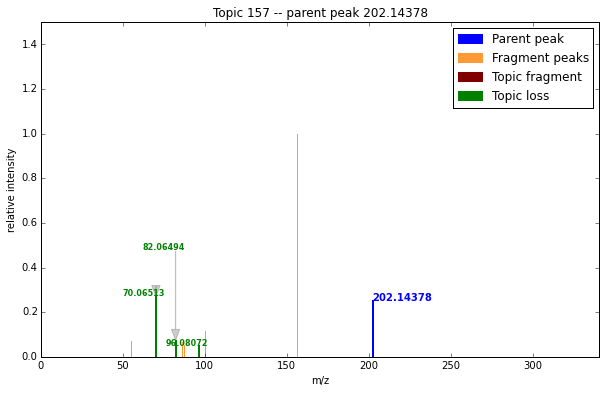

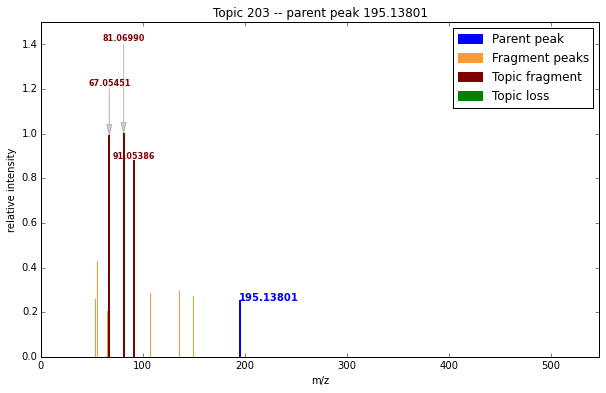

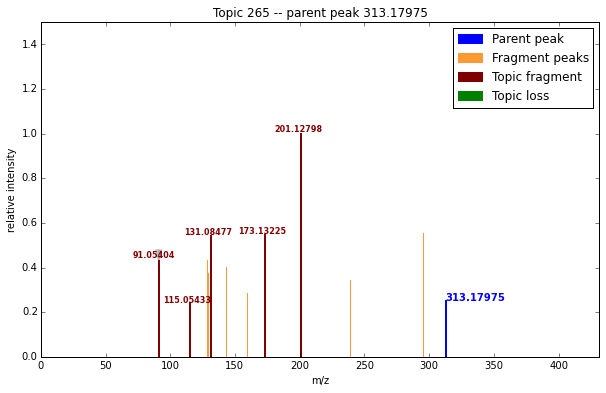

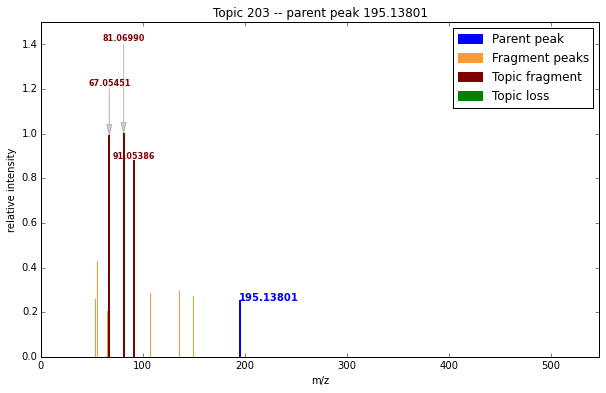

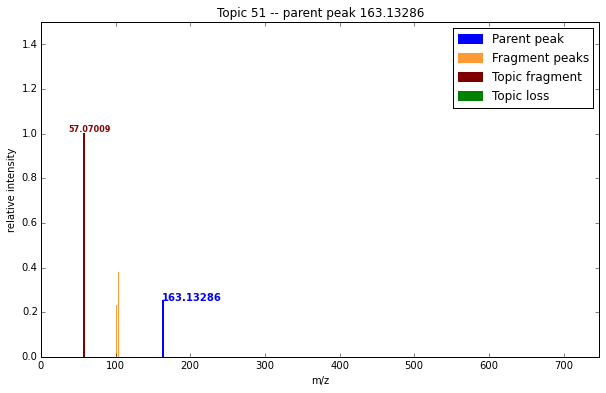

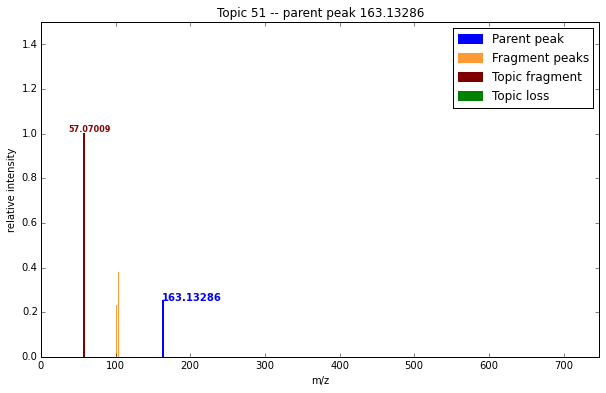

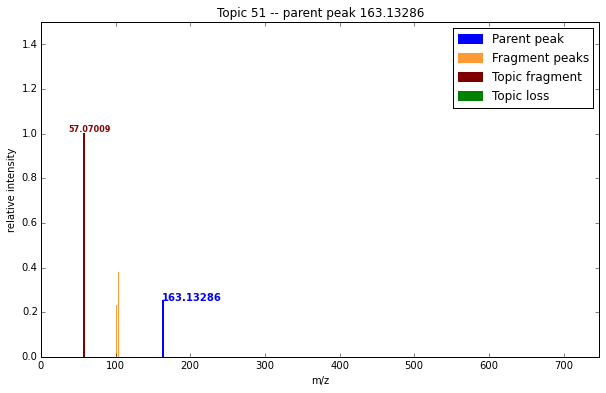

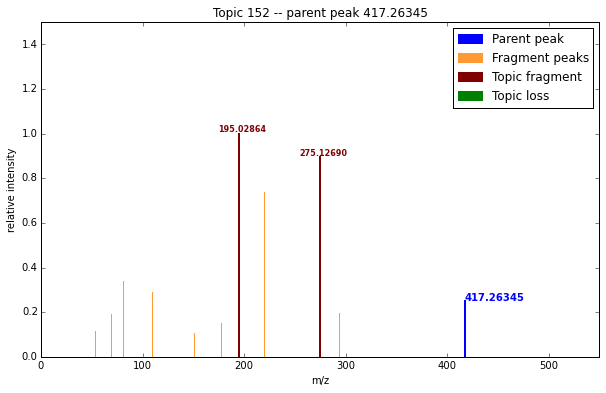

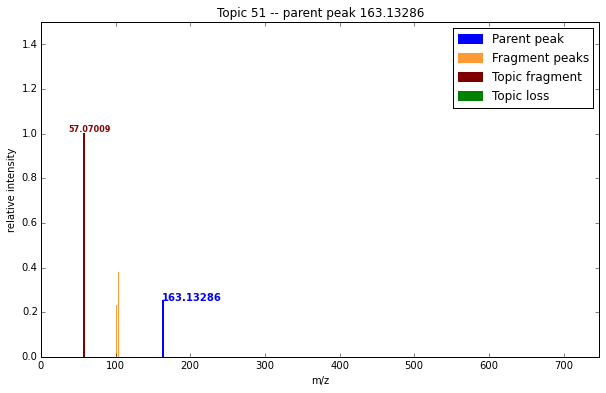

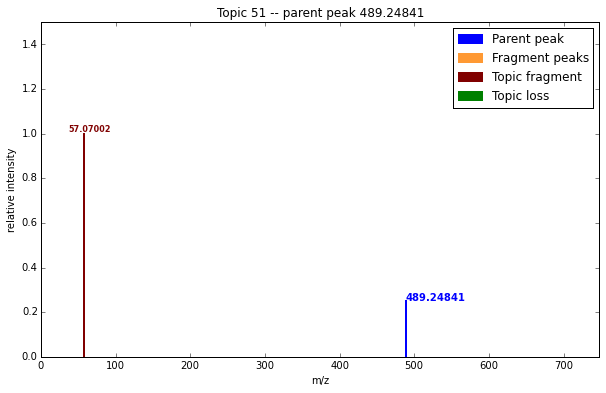

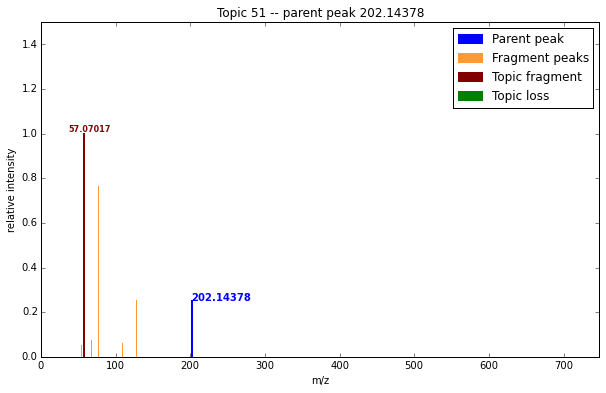

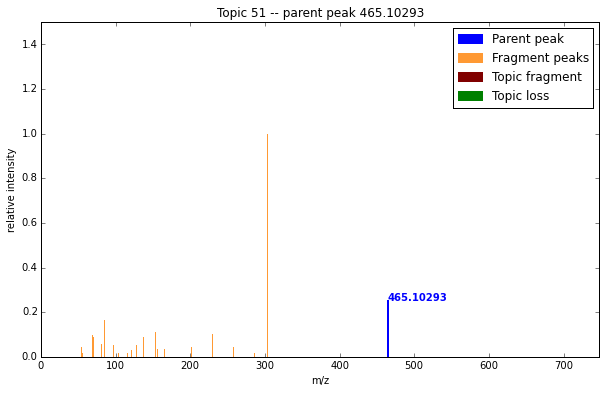

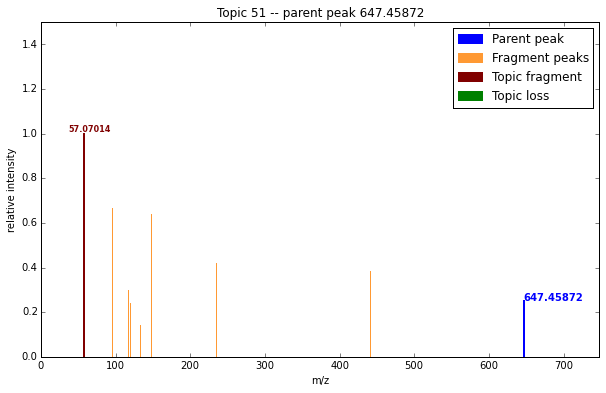

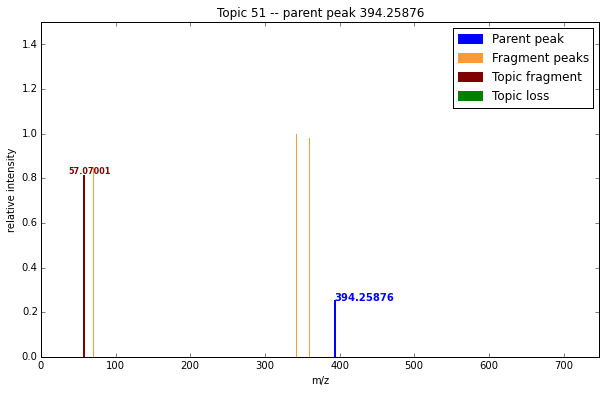

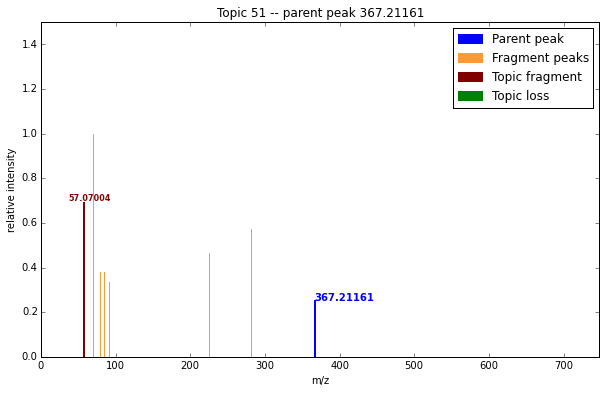

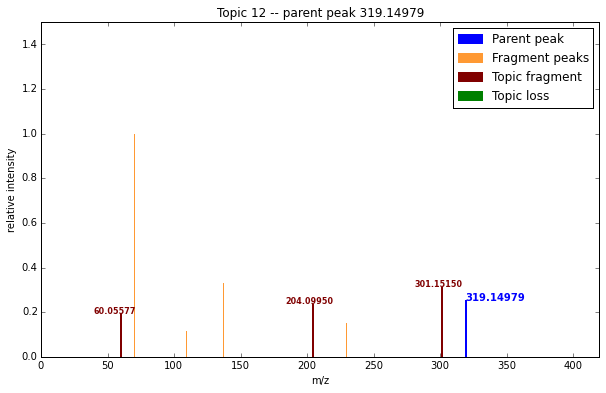

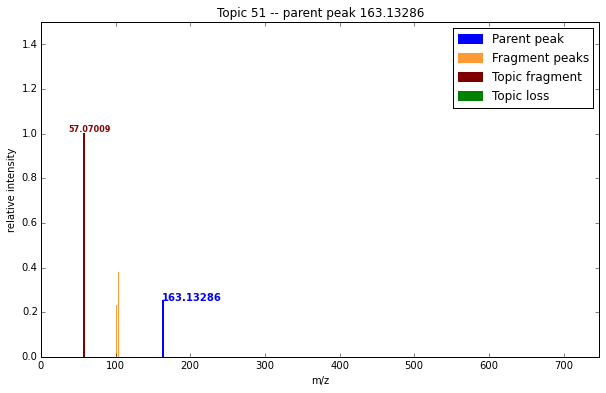

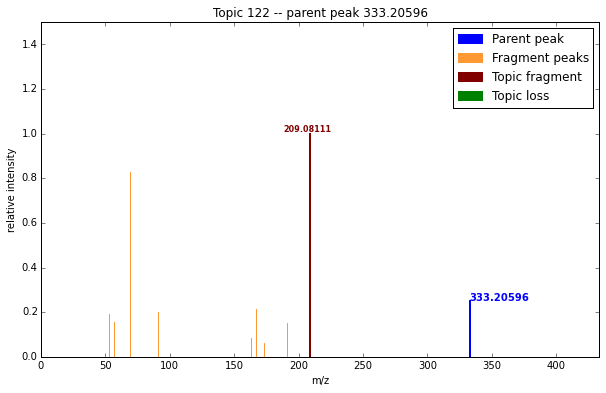

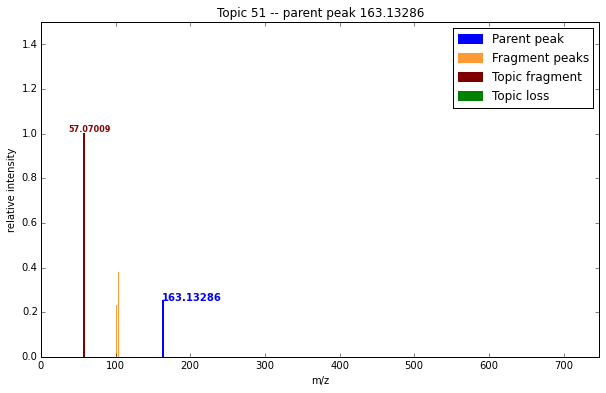

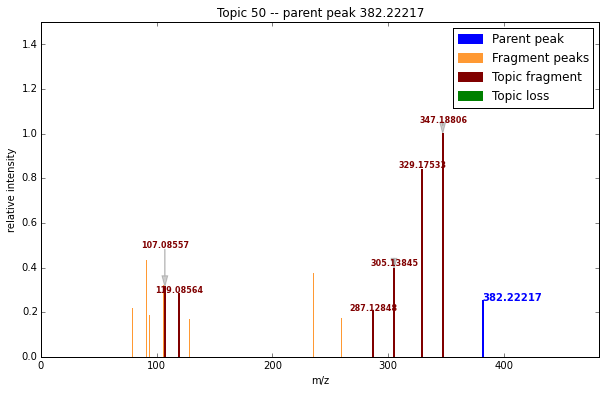

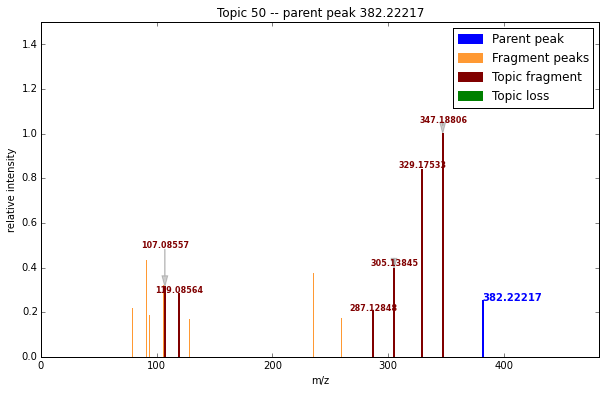

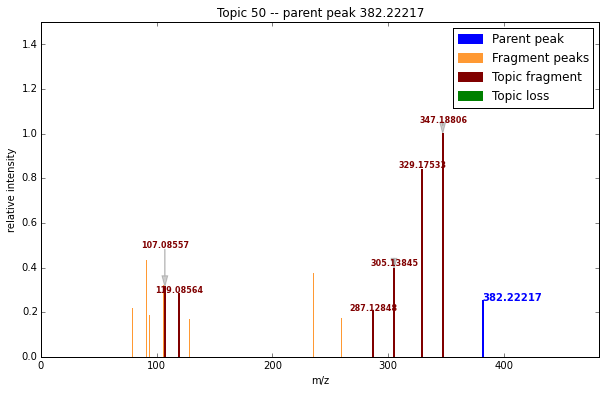

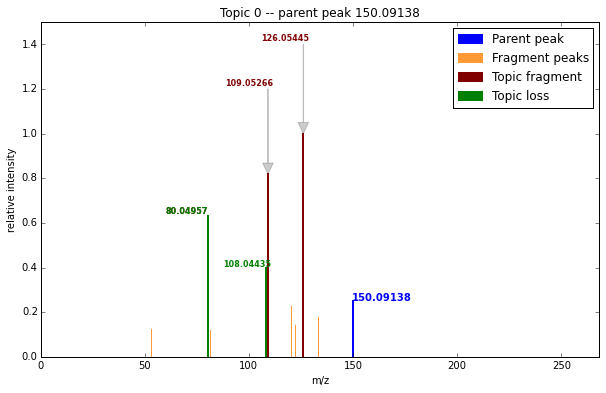

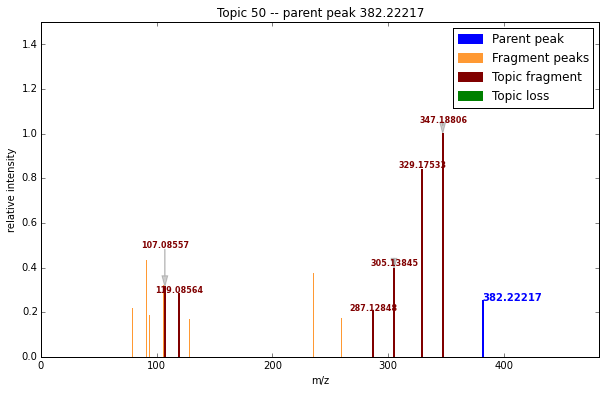

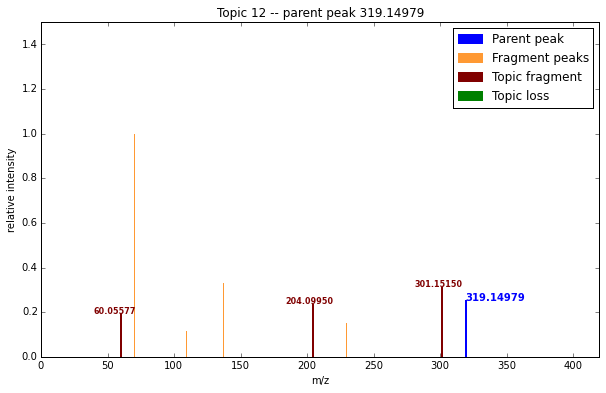

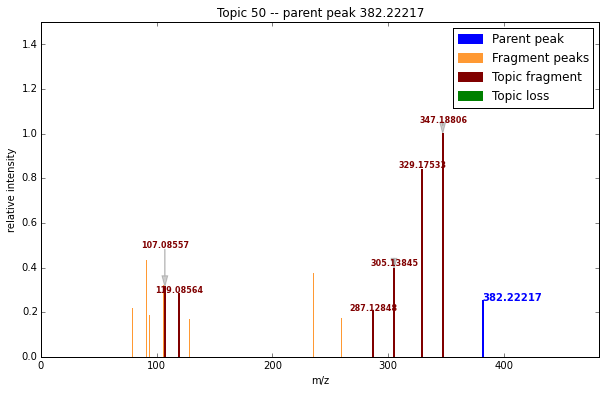

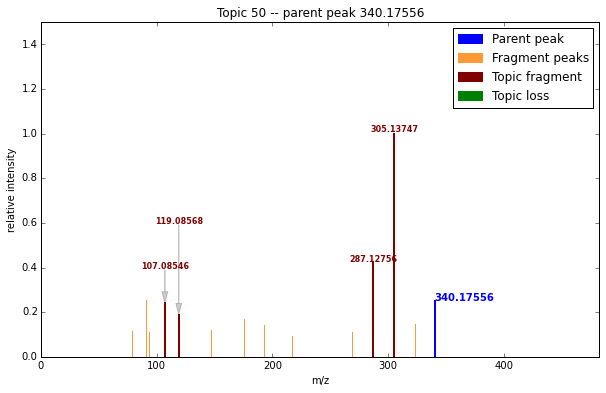

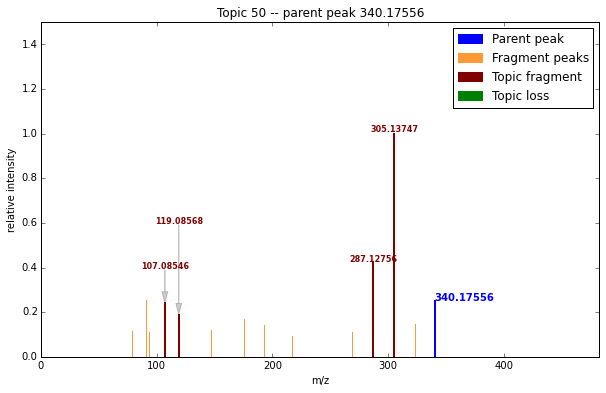

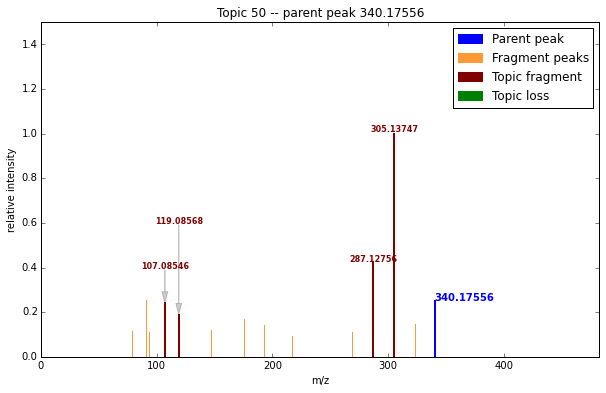

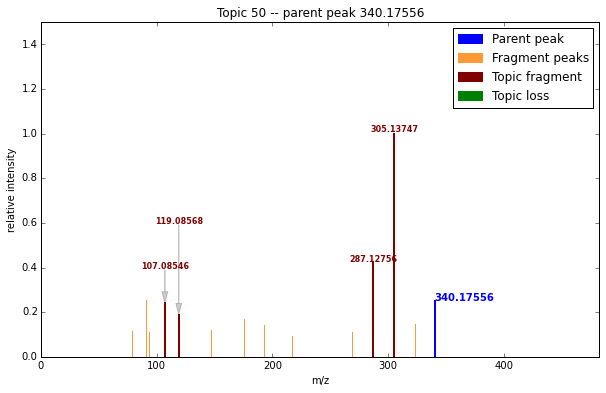

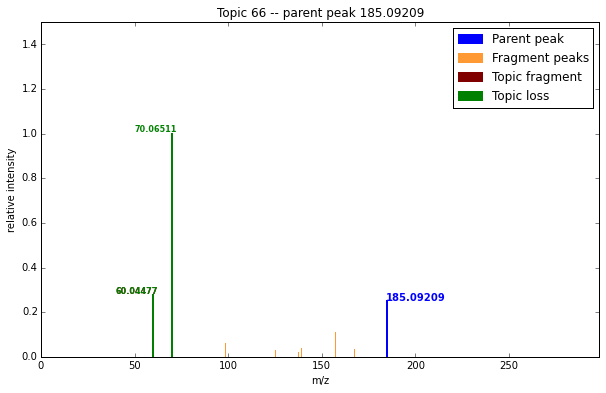

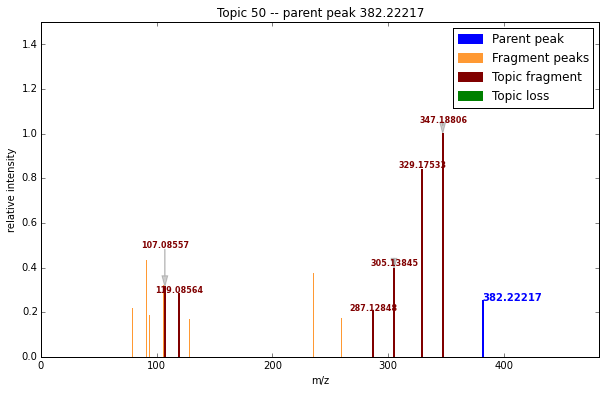

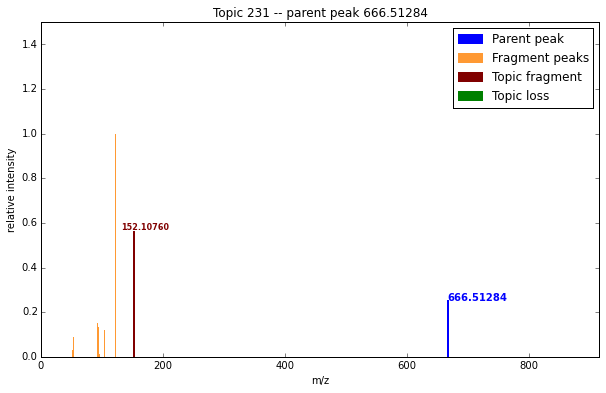

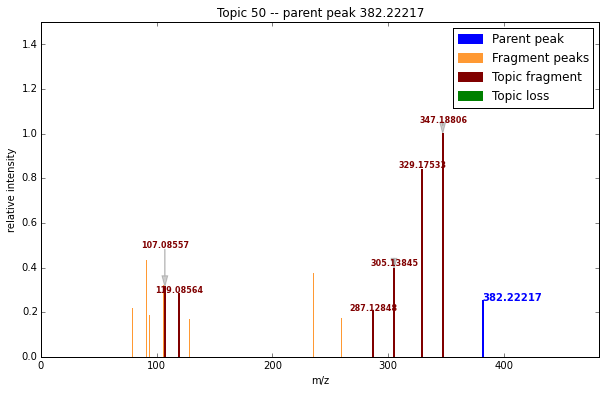

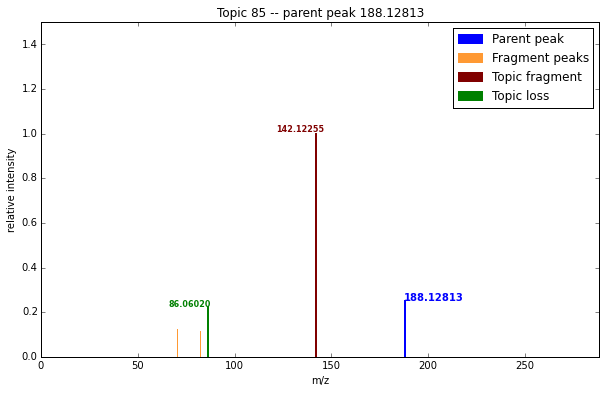

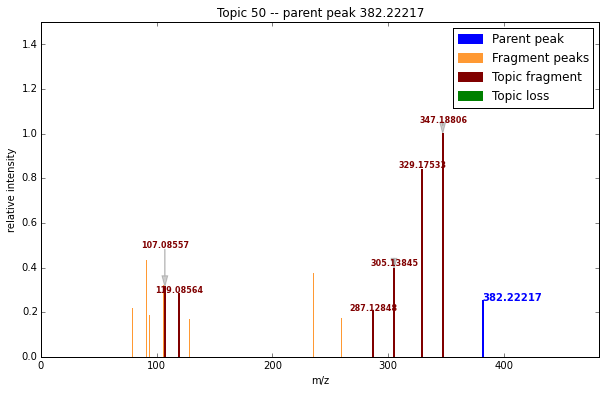

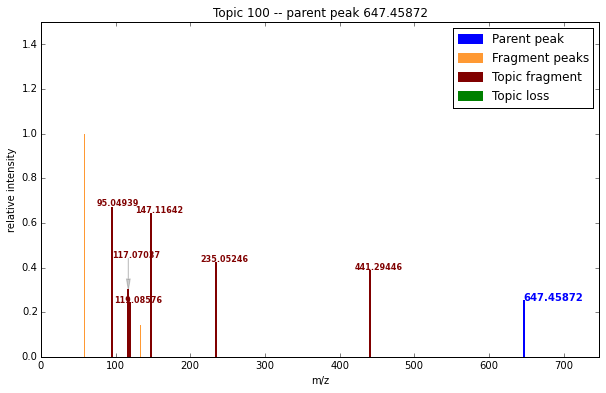

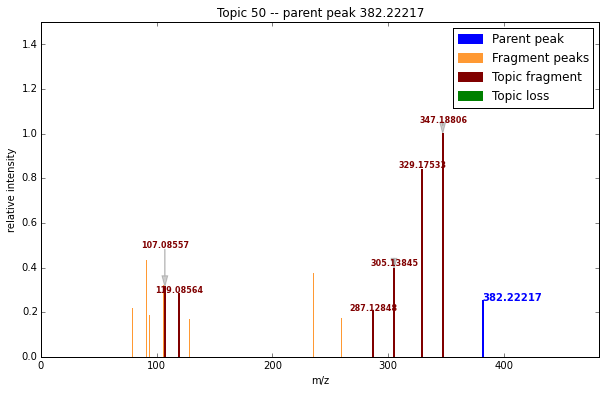

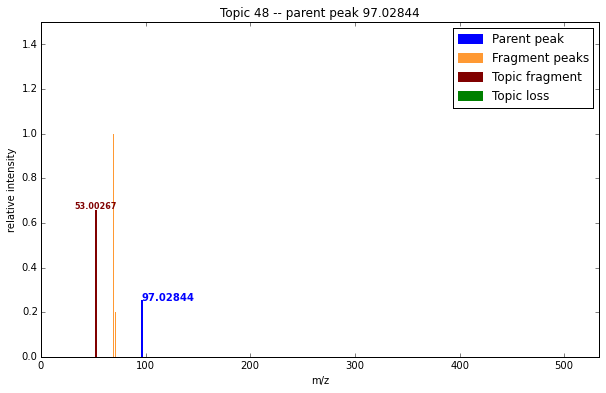

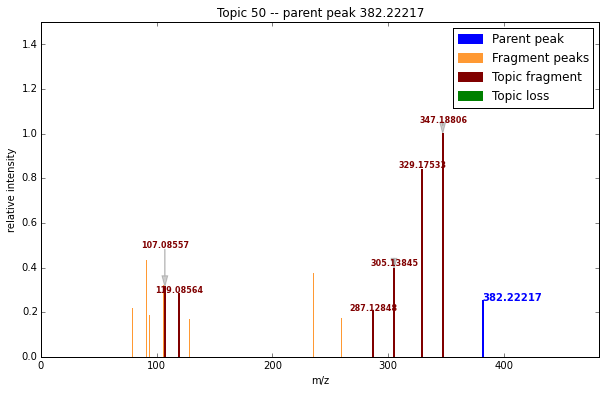

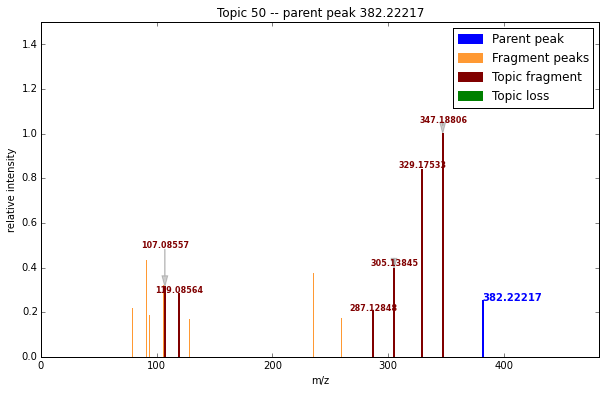

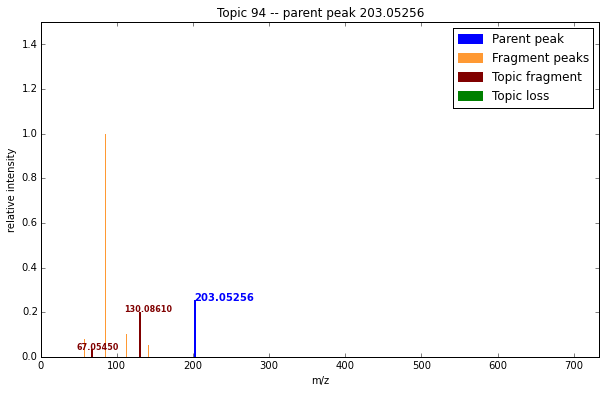

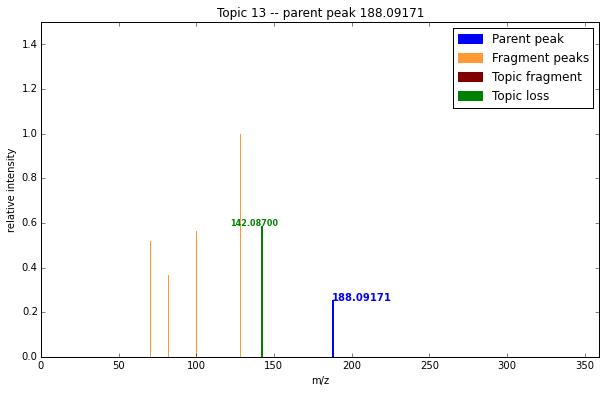

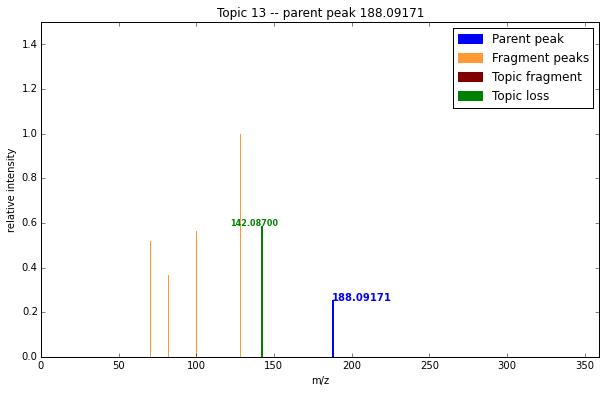

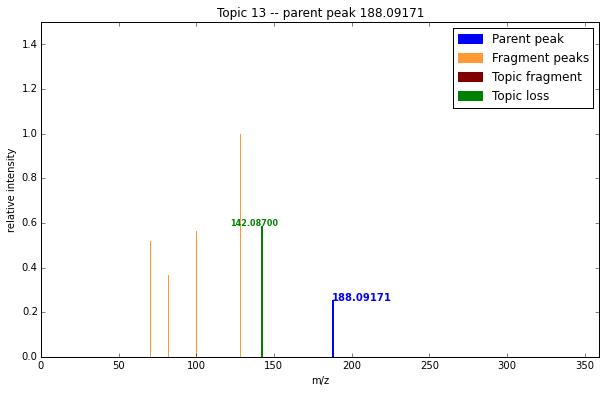

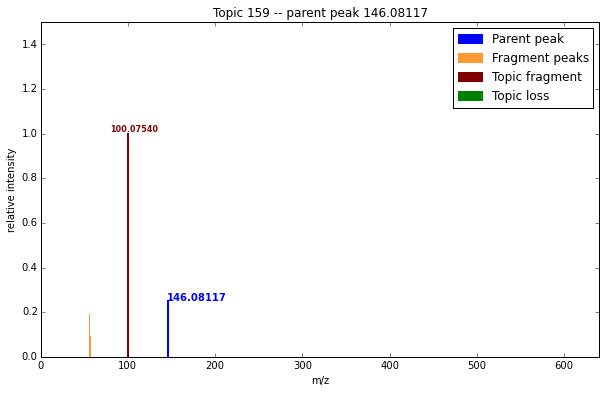

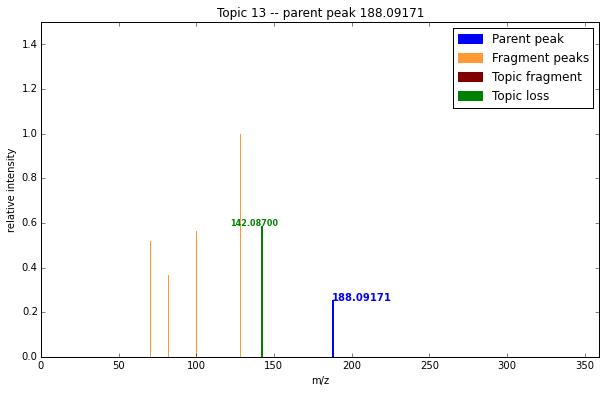

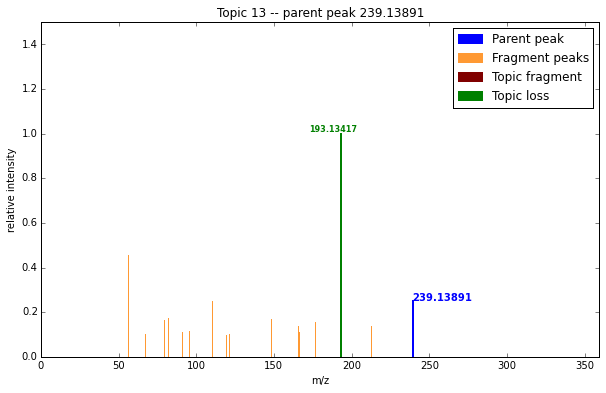

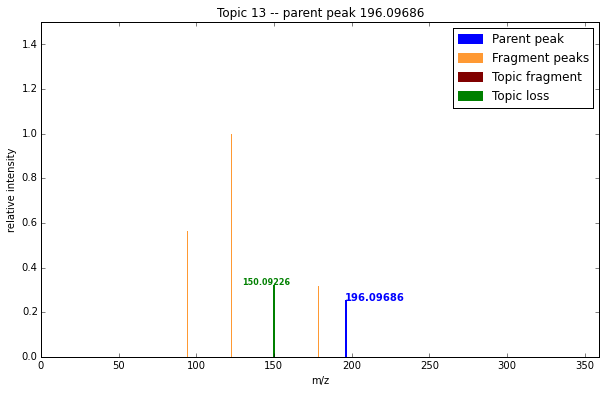

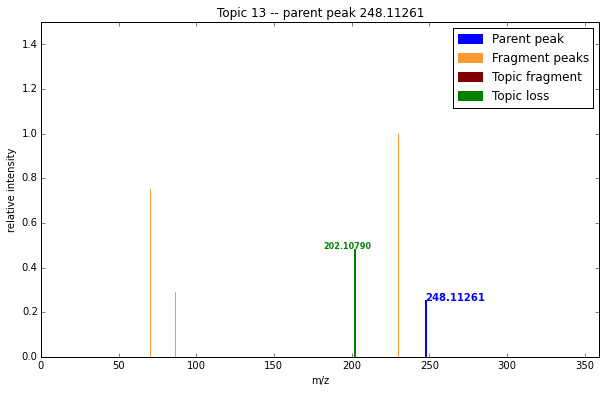

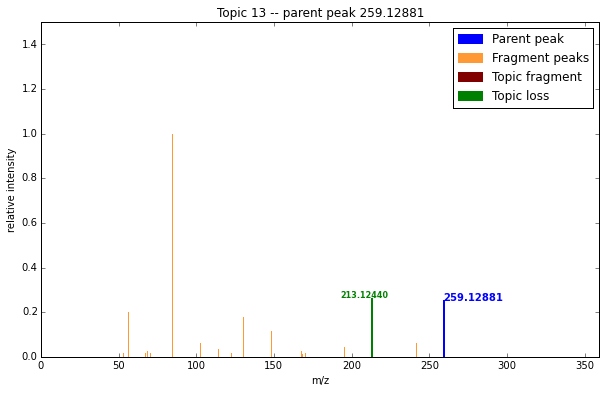

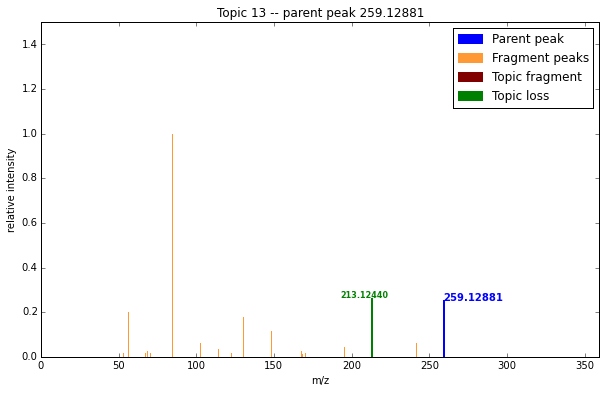

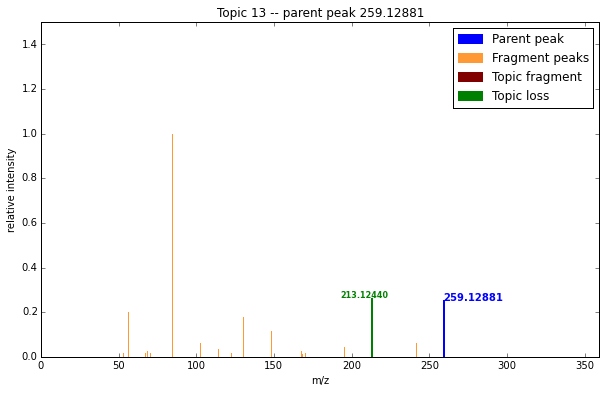

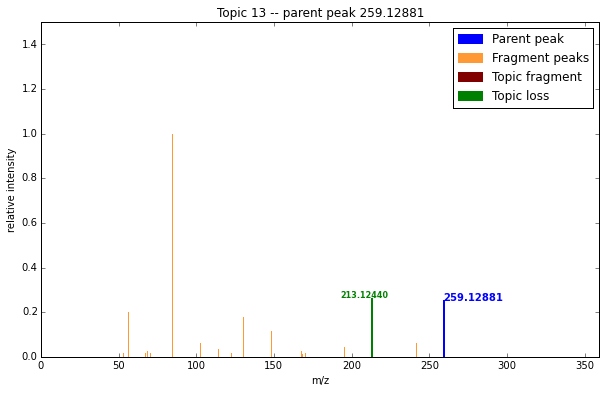

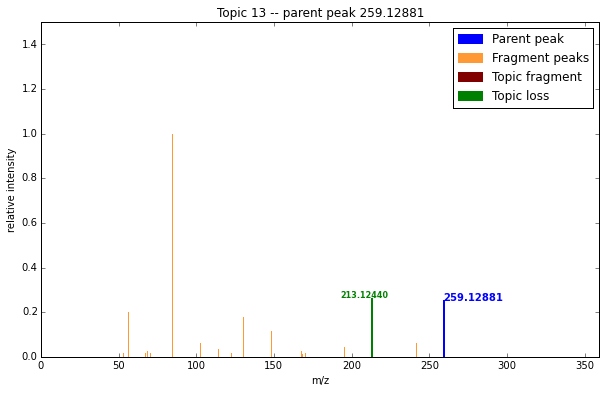

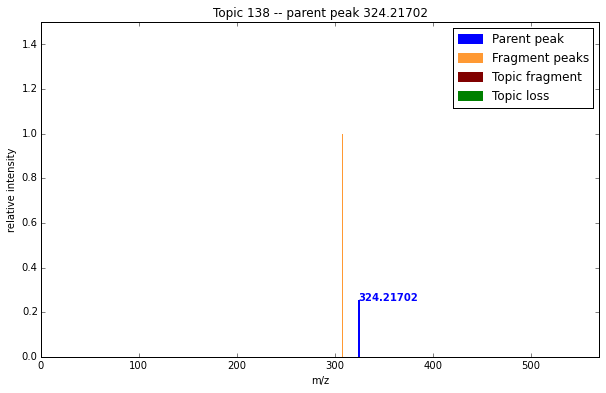

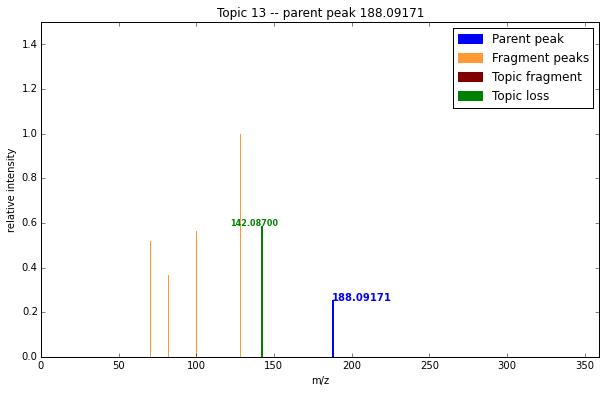

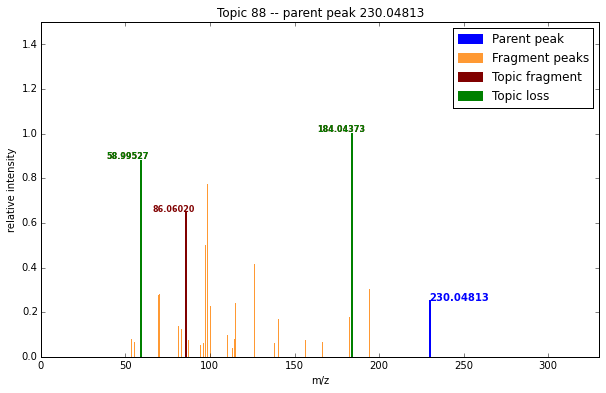

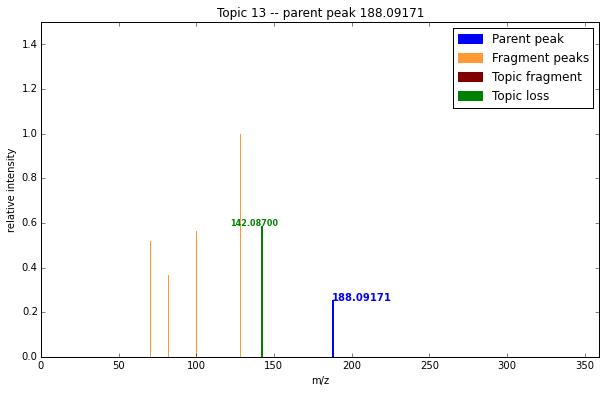

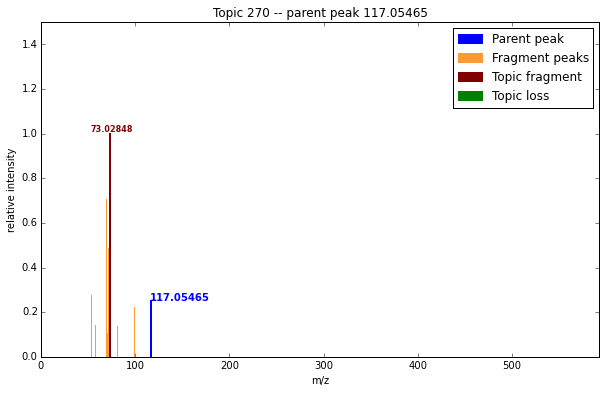

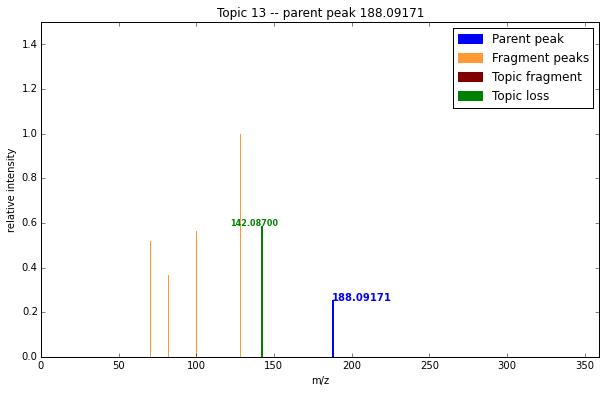

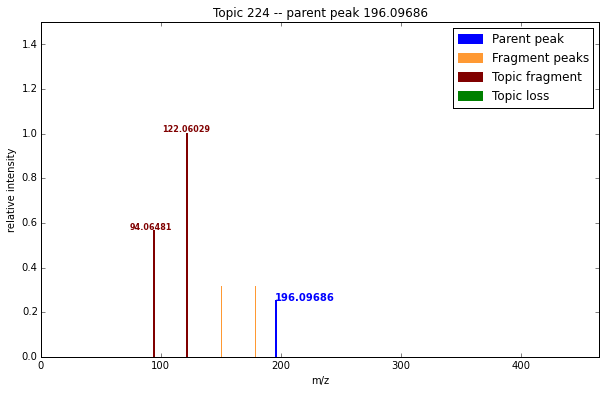

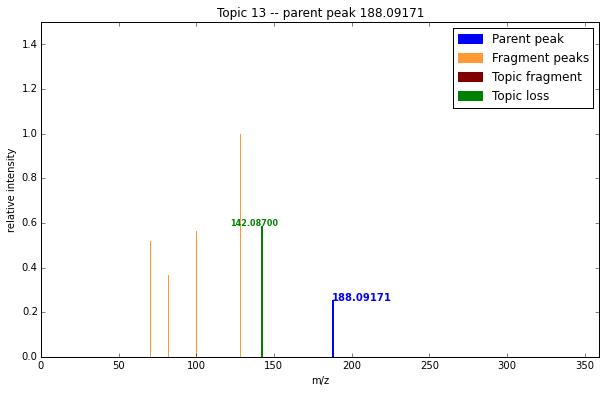

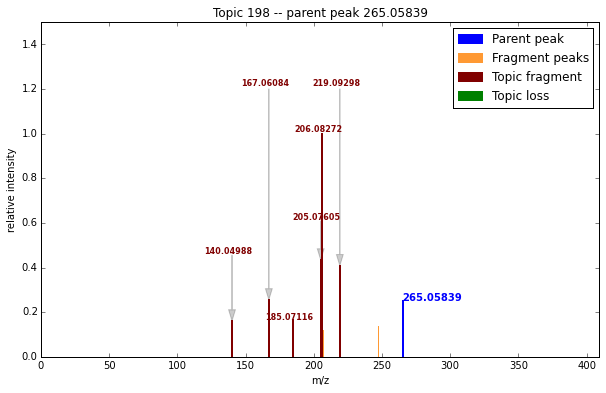

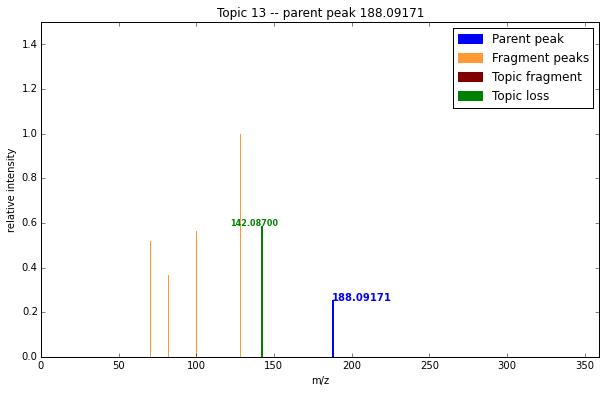

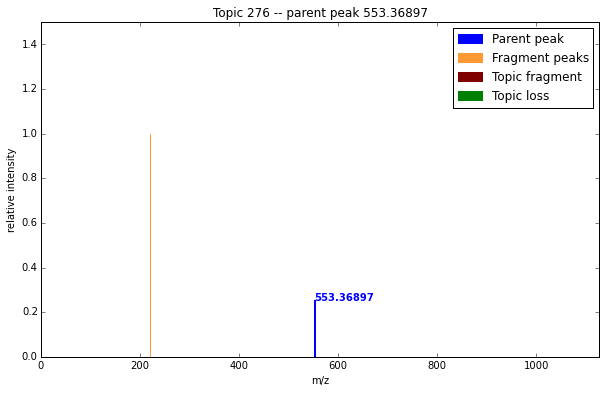

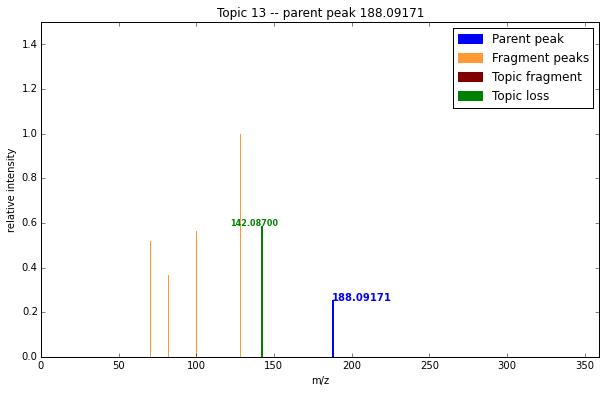

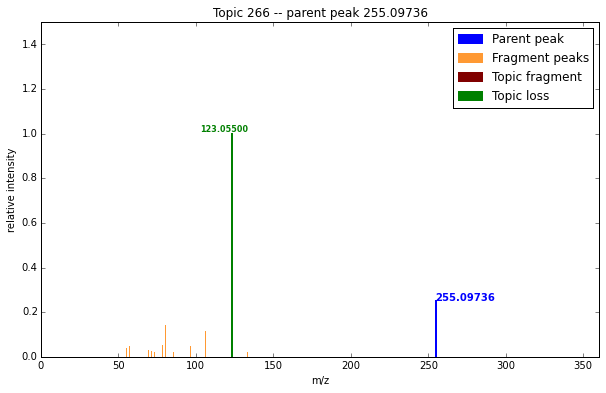

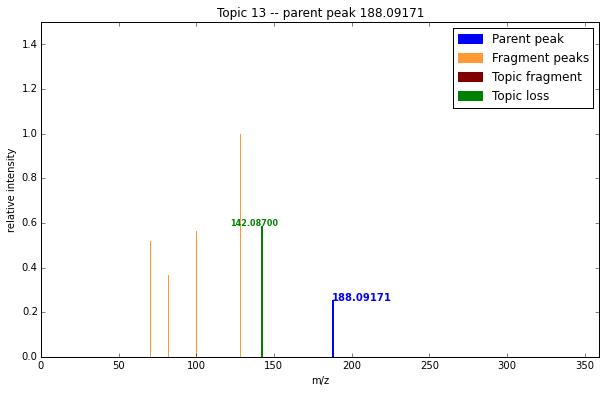

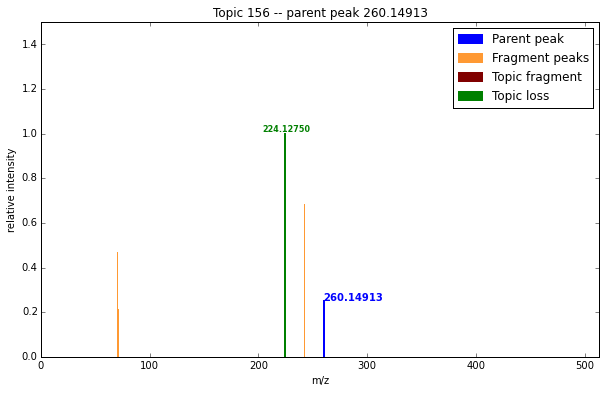

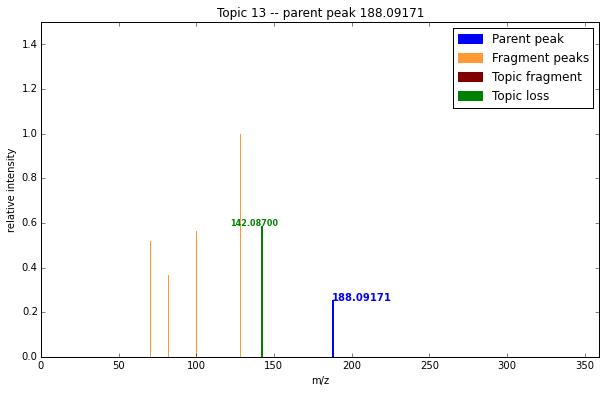

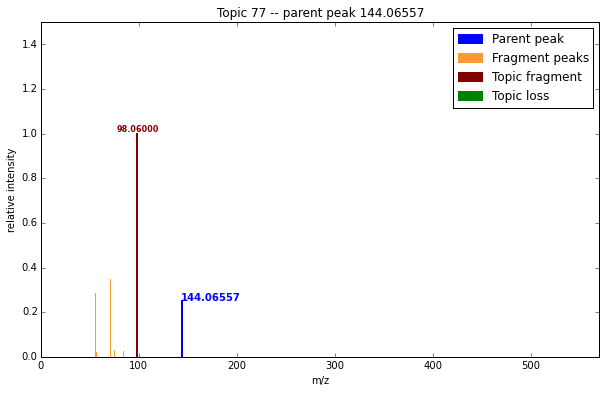

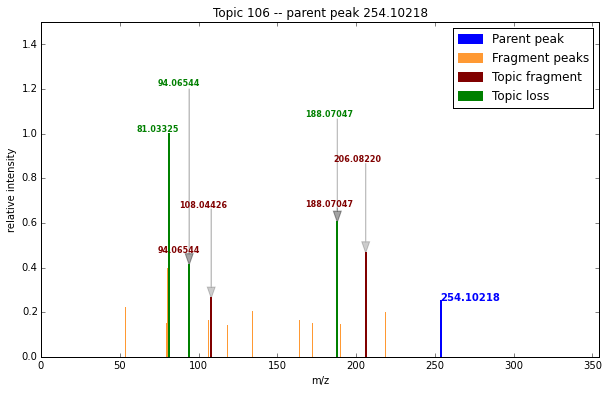

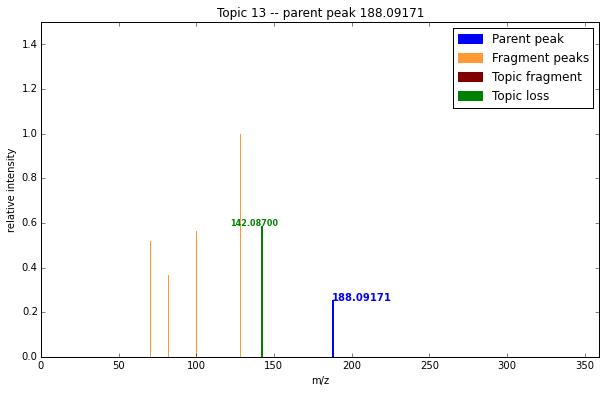

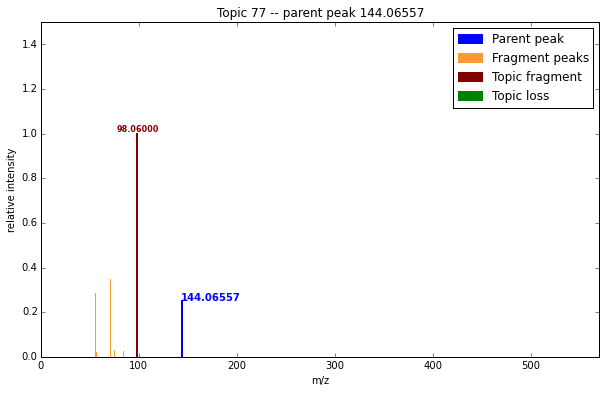

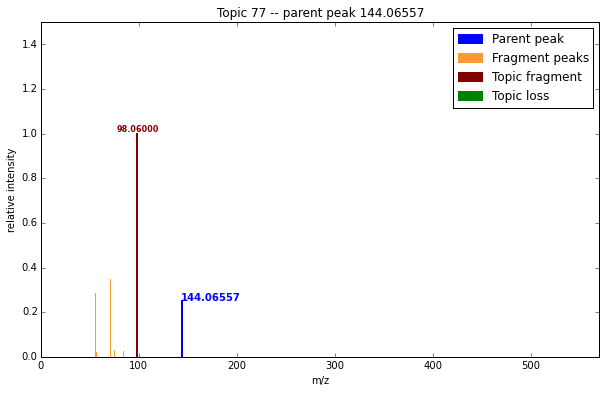

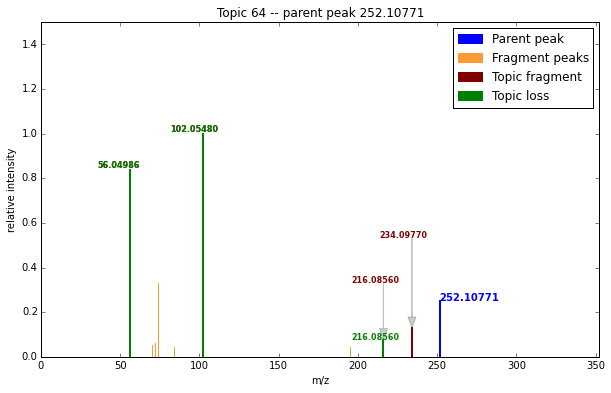

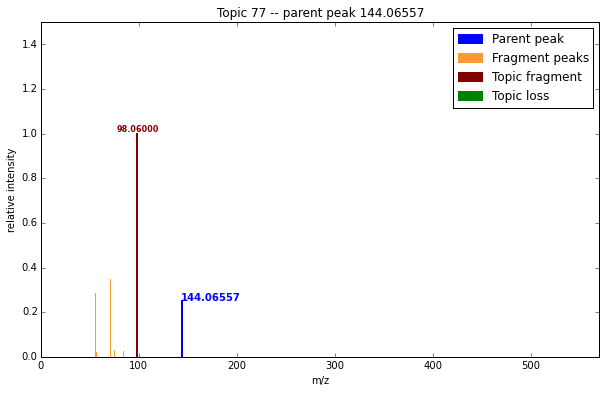

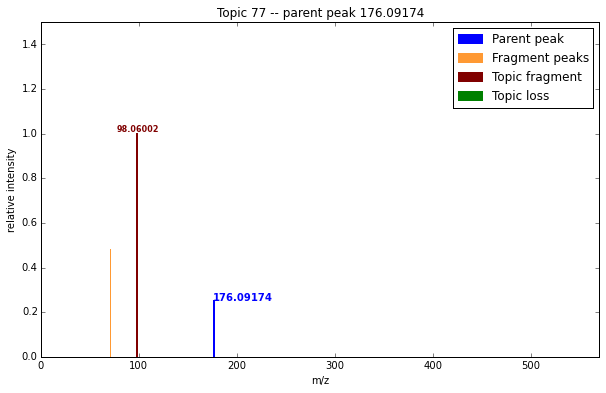

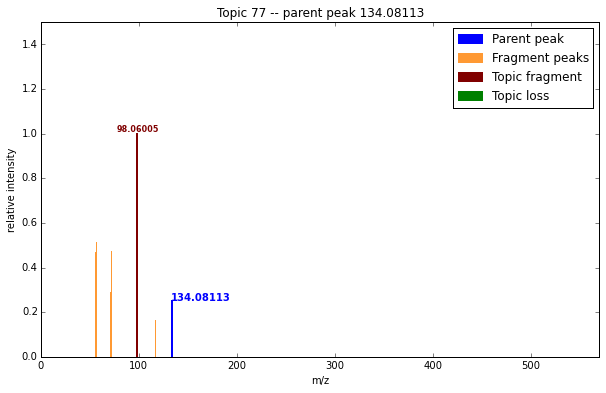

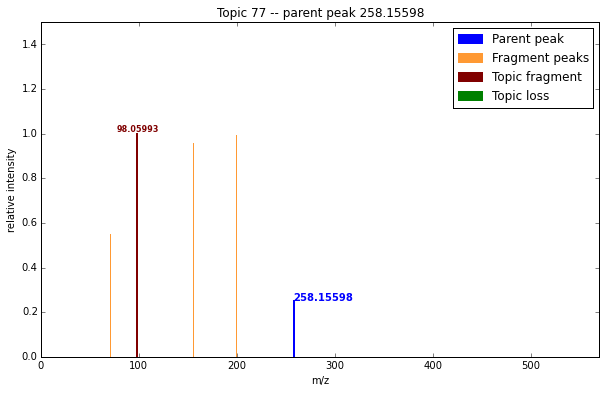

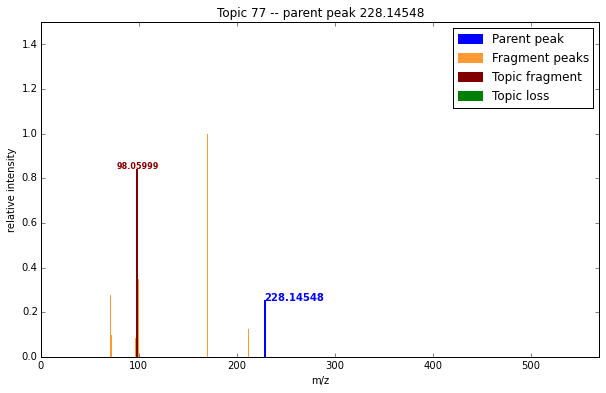

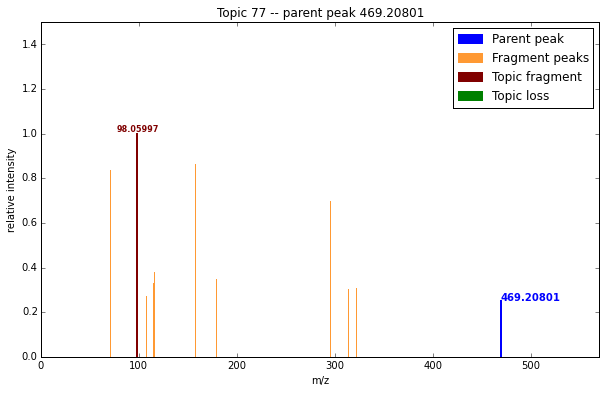

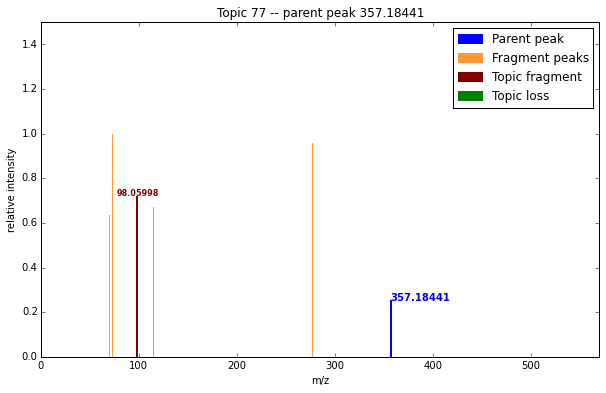

In [8]:
ms2lda.plot_lda_fragments(consistency=0.50, sort_by="h_index", interactive=True)
# ms2lda.plot_lda_fragments(consistency=0.50, sort_by="in_degree")